In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'  # or another available font
from scipy.spatial import distance
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings("ignore", message="findfont: Font family.*not found")

In [3]:
f = 'Data/neuron_barcodes_full_roi.npz'

data = np.load(f, allow_pickle=True)

In [4]:
print(data.files)  


['arr_0']


In [5]:
barcode_data = data['arr_0'].item()

In [6]:
# trying to understand the data

print(type(barcode_data))

<class 'dict'>


In [7]:
barcode_data[87]

{'discrete': [np.float64(213.35721462950573),
  np.float64(6.996005227843493),
  np.float64(238.59853693584145),
  np.float64(4.732504683573465),
  np.float64(141.2559670330141),
  np.float64(4.198747176458477),
  np.float64(146.08117083275386),
  np.float64(46.56639589263466),
  np.float64(227.72099066745432),
  np.float64(192.608018099803),
  np.float64(223.6278790644571),
  np.float64(198.82492547192652),
  np.float64(20.09403312343065),
  np.float64(214.85072766412495),
  np.float64(216.16899244221366),
  np.float64(93.47772427487072),
  np.float64(11.167163845051865),
  np.float64(12.889497785640694)],
 'enhanced': [np.float64(15.913517832328703),
  np.float64(7.8298461966865265),
  np.float64(25.12014528551138),
  np.float64(21.784289566308185),
  np.float64(15.574080254057899),
  np.float64(27.8878666509637),
  np.float64(68.77876788430359),
  np.float64(51.36405498022746),
  np.float64(37.562213267773025),
  np.float64(21.500037080985777),
  np.float64(49.185534103657496),
  np

In [8]:
barcode_data[87]['enhanced']

[np.float64(15.913517832328703),
 np.float64(7.8298461966865265),
 np.float64(25.12014528551138),
 np.float64(21.784289566308185),
 np.float64(15.574080254057899),
 np.float64(27.8878666509637),
 np.float64(68.77876788430359),
 np.float64(51.36405498022746),
 np.float64(37.562213267773025),
 np.float64(21.500037080985777),
 np.float64(49.185534103657496),
 np.float64(36.85060251165256),
 np.float64(17.629756872517902),
 np.float64(29.248928425738217),
 np.float64(32.34881938998646),
 np.float64(34.611172936002475),
 np.float64(11.981521611516406),
 np.float64(10.75846314877777)]

In [9]:
barcode_data[87]['discrete']
# this is the newtwork predicting if this is a signal or not. 

[np.float64(213.35721462950573),
 np.float64(6.996005227843493),
 np.float64(238.59853693584145),
 np.float64(4.732504683573465),
 np.float64(141.2559670330141),
 np.float64(4.198747176458477),
 np.float64(146.08117083275386),
 np.float64(46.56639589263466),
 np.float64(227.72099066745432),
 np.float64(192.608018099803),
 np.float64(223.6278790644571),
 np.float64(198.82492547192652),
 np.float64(20.09403312343065),
 np.float64(214.85072766412495),
 np.float64(216.16899244221366),
 np.float64(93.47772427487072),
 np.float64(11.167163845051865),
 np.float64(12.889497785640694)]

In [10]:
# number of neurites/objects in the sample
len(barcode_data)

1183

In [11]:
discrete = np.array([obj_dict['discrete'] for obj_dict in barcode_data.values()])

print(discrete.shape, discrete[0])

# loops through barcode_data and gets the discrete values for each object
# creates a numpy array of the discrete values
# 369 neurites and 18 channels



(1183, 18) [  0.51602616   1.32000917 232.13382027   3.48014625   1.00688181
   1.59461497  91.16286009   0.97751311  13.20696868  32.92296907
   4.39816364   6.35860224  14.20406279  14.75671309   1.13927925
   7.73499308  10.78001131   9.02222209]


In [12]:
# axis 0 means that teh mean is being calulcating along the row so down each column

np.mean(discrete, axis=0)

array([69.26372976, 50.91248732, 92.13672946, 23.00943297, 36.24936874,
       26.00295628, 35.36237316, 23.06933474, 66.58678931, 69.24116681,
       63.25197053, 54.05409582, 69.41723506, 69.00246914, 58.19795482,
       46.16757781, 64.59386621, 58.66220006])

In [13]:
# defining the threhold value
# here it is the mean of the discrete values

threshold = np.mean(discrete, axis=0)

# creating a binary mask where the threshold is applied to each channel
# if the value is greater than the threshold, it is 1, otherwise it is 0
thresholded = (discrete > threshold).astype(int)

In [14]:
print(thresholded.shape, thresholded[0])

(1183, 18) [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
# head of thresholded
thresholded[0:5]

array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

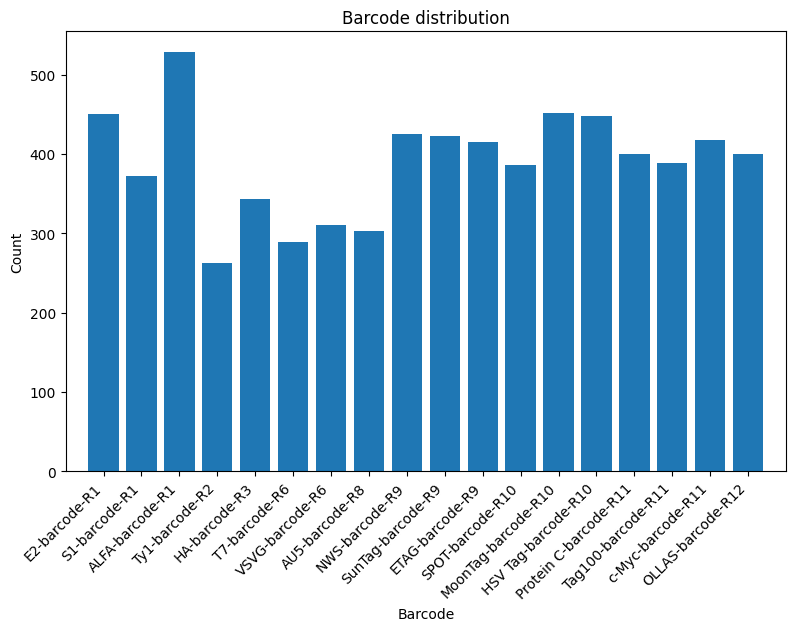

In [16]:
counts = thresholded.sum(axis=0)

num_columns = len(counts)
x_positions = np.arange(num_columns)

barcodes = [
    'E2-barcode-R1',
    'S1-barcode-R1',
    'ALFA-barcode-R1',
    'Ty1-barcode-R2',
    'HA-barcode-R3',
    'T7-barcode-R6',
    'VSVG-barcode-R6',
    'AU5-barcode-R8',
    'NWS-barcode-R9',
    'SunTag-barcode-R9',
    'ETAG-barcode-R9',
    'SPOT-barcode-R10',
    'MoonTag-barcode-R10',
    'HSV Tag-barcode-R10',
    'Protein C-barcode-R11',
    'Tag100-barcode-R11',
    'c-Myc-barcode-R11',
    'OLLAS-barcode-R12'
]

plt.figure(figsize=(8, 6))
plt.bar(x_positions, counts)
plt.xlim(-1, num_columns)
#plt.xticks(x_positions, x_positions)
plt.xticks(x_positions, barcodes, rotation=45, ha='right')
plt.tight_layout()
#plt.xlabel("Channel")
plt.xlabel("Barcode")
plt.ylabel("Count")
plt.title(f"Barcode distribution")
plt.show()

In [17]:
thresholded.shape[0]

1183

## Plot: Barcode Distribution as %

[450 372 528 262 343 289 310 303 425 423 415 386 451 448 400 388 417 400] [38.03888419 31.4454776  44.63229079 22.14708369 28.99408284 24.42941674
 26.20456467 25.61284869 35.92561285 35.75655114 35.08030431 32.62890955
 38.12341505 37.86982249 33.8123415  32.79797126 35.24936602 33.8123415 ]


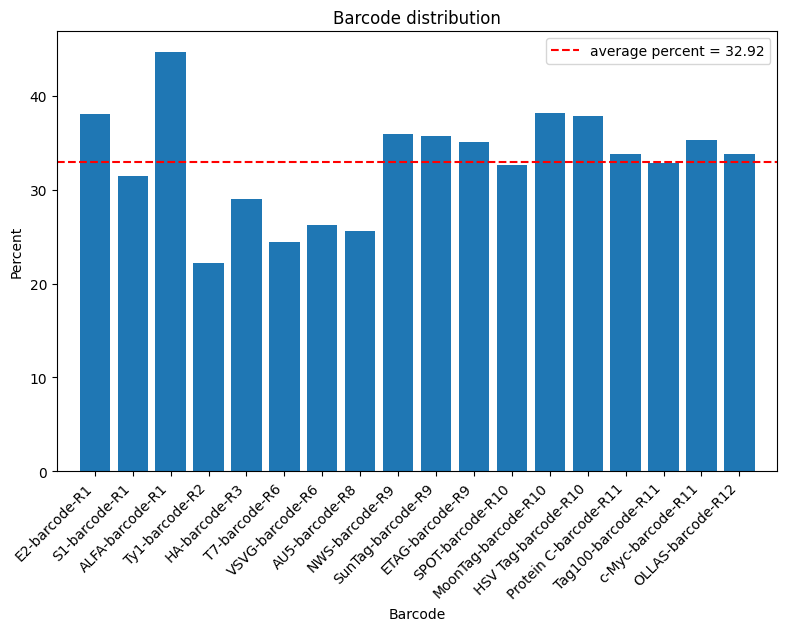

Minimum percentage: 22.15%
Maximum percentage: 44.63%


In [18]:
total_cells = thresholded.shape[0]
# 369 cells

y_axis = (counts / total_cells)*100
y_label = "Percent"

print(counts, y_axis)

plt.figure(figsize=(8, 6))
plt.bar(x_positions, y_axis)
plt.xlim(-1, num_columns)
#plt.xticks(x_positions, x_positions)
plt.xticks(x_positions, barcodes, rotation=45, ha='right')


avg = np.nanmean(y_axis, axis=0)
plt.axhline(
    avg,
    linestyle="--",
    color="red",
    label=f"average percent = {avg:.2f}",
)
plt.legend()

plt.tight_layout()
#plt.xlabel("Channel")
plt.xlabel("Barcode")
plt.ylabel("Percent")
plt.title(f"Barcode distribution")
plt.show()

# Get min and max distribution
min_expr = np.min(y_axis)
max_expr = np.max(y_axis)
print(f"Minimum percentage: {min_expr:.2f}%")
print(f"Maximum percentage: {max_expr:.2f}%")


In [19]:
# sum of 1s in each row (total channels expressed by each object)
# this is the number of channels expressed by each object
expressions_per_object = np.nansum(thresholded, axis=1)
print(expressions_per_object)

# mean and standard dev
mean_expressions = np.mean(expressions_per_object)
std_expressions = np.std(expressions_per_object)

print(f"mean: {mean_expressions}")
print(f"stddev: {std_expressions}")

threshold = 0.9

# threshold for being significantly more expressive, e.g expressing in more than 90% of the channels
channels_expressed = threshold * thresholded.shape[1]

print(channels_expressed)

[2 8 3 ... 1 5 7]
mean: 5.925612848689772
stddev: 4.862909628123609
16.2


/tmp/ipykernel_46396/2907015639.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


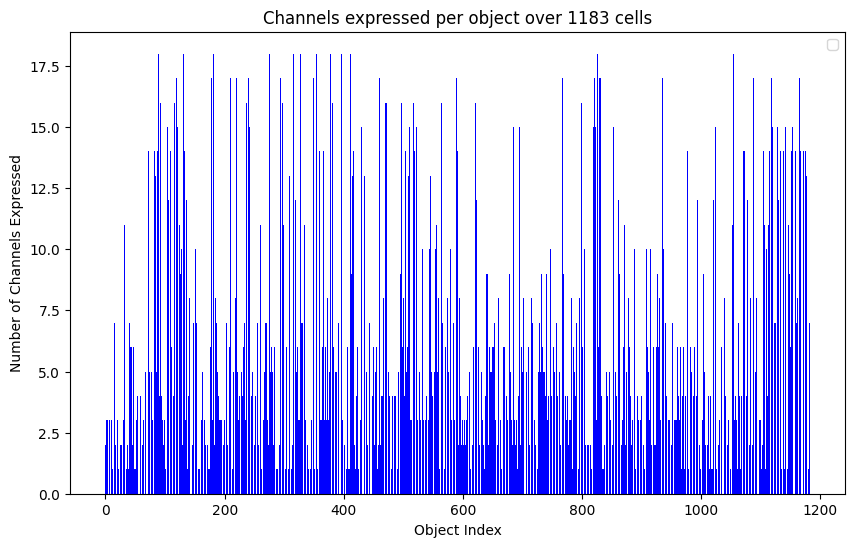

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(expressions_per_object)),
    expressions_per_object,
    color="blue",
)
plt.xlabel("Object Index")
plt.ylabel("Number of Channels Expressed")
plt.title(
    f"Channels expressed per object over"
    f" {total_cells} cells"
)
plt.legend()

/tmp/ipykernel_46396/1434313306.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


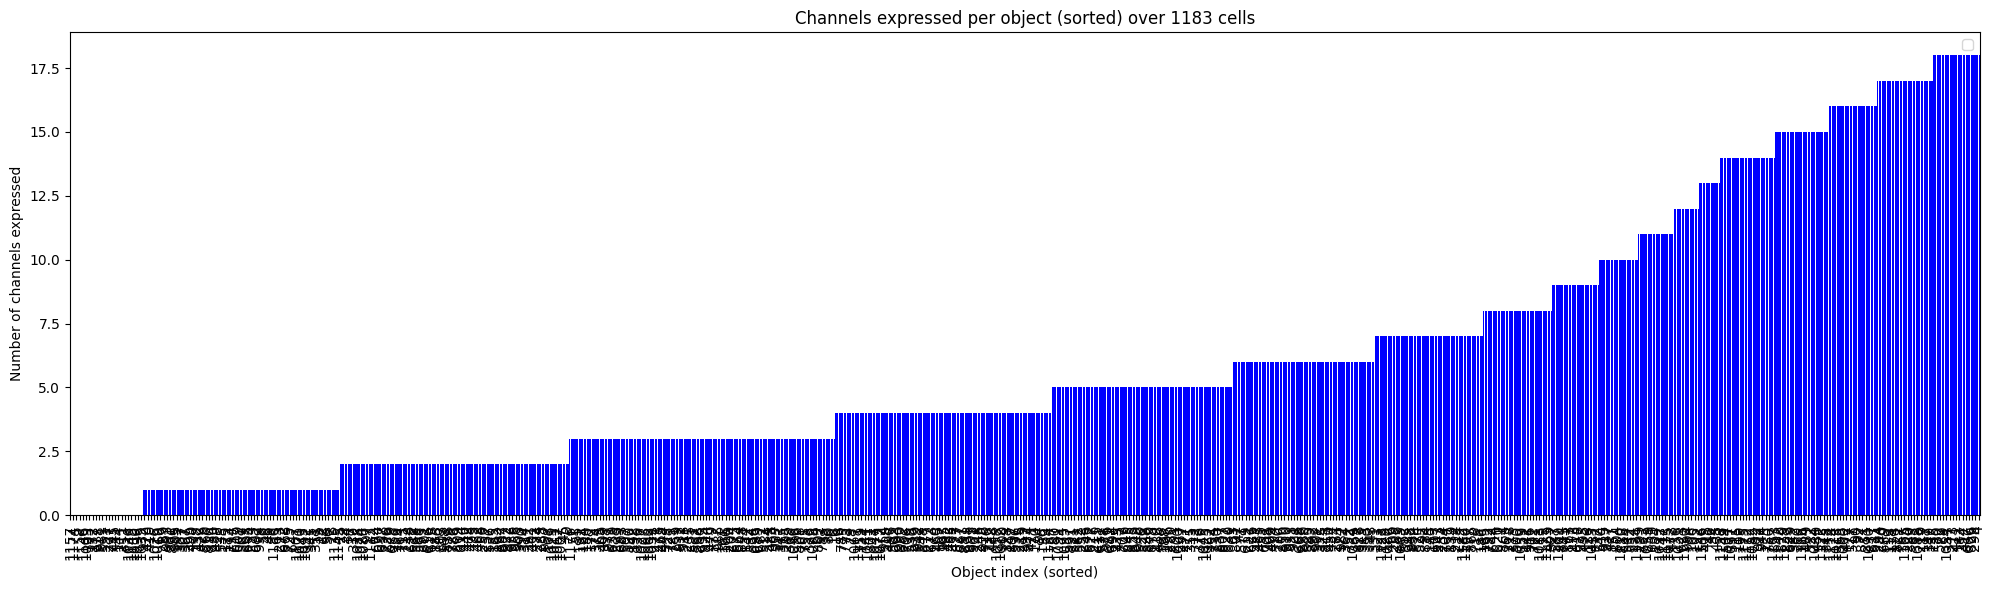

In [21]:
# sort objects by the number of channels expressed
sorted_indices = np.argsort(expressions_per_object)
sorted_expressions = expressions_per_object[sorted_indices]

label_step = 2  # Show every nth label

plt.figure(figsize=(20, 6))
plt.bar(
    range(len(sorted_expressions)),
    sorted_expressions,
    color="blue",
    align="edge",
)
plt.xticks(
    range(0, len(sorted_expressions), label_step),
    sorted_indices[::label_step],
    rotation=90,
)  # Set fewer x-ticks
plt.xlabel("Object index (sorted)")
plt.ylabel("Number of channels expressed")
plt.title(
    f"Channels expressed per object (sorted) over"
    f" {total_cells} cells"
)
plt.legend()
plt.tight_layout()
plt.margins(x=0)

(29,)
Indices with more than 17 channels expressed:
  Object 4 has 18 channels expressed
  Object 6 has 18 channels expressed
  Object 80 has 18 channels expressed
  Object 89 has 18 channels expressed
  Object 98 has 18 channels expressed
  Object 131 has 18 channels expressed
  Object 135 has 18 channels expressed
  Object 154 has 18 channels expressed
  Object 181 has 18 channels expressed
  Object 182 has 18 channels expressed
  Object 244 has 18 channels expressed
  Object 273 has 18 channels expressed
  Object 275 has 18 channels expressed
  Object 298 has 18 channels expressed
  Object 316 has 18 channels expressed
  Object 327 has 18 channels expressed
  Object 347 has 18 channels expressed
  Object 354 has 18 channels expressed
  Object 370 has 18 channels expressed
  Object 378 has 18 channels expressed
  Object 394 has 18 channels expressed
  Object 396 has 18 channels expressed
  Object 411 has 18 channels expressed
  Object 417 has 18 channels expressed
  Object 572 has 18

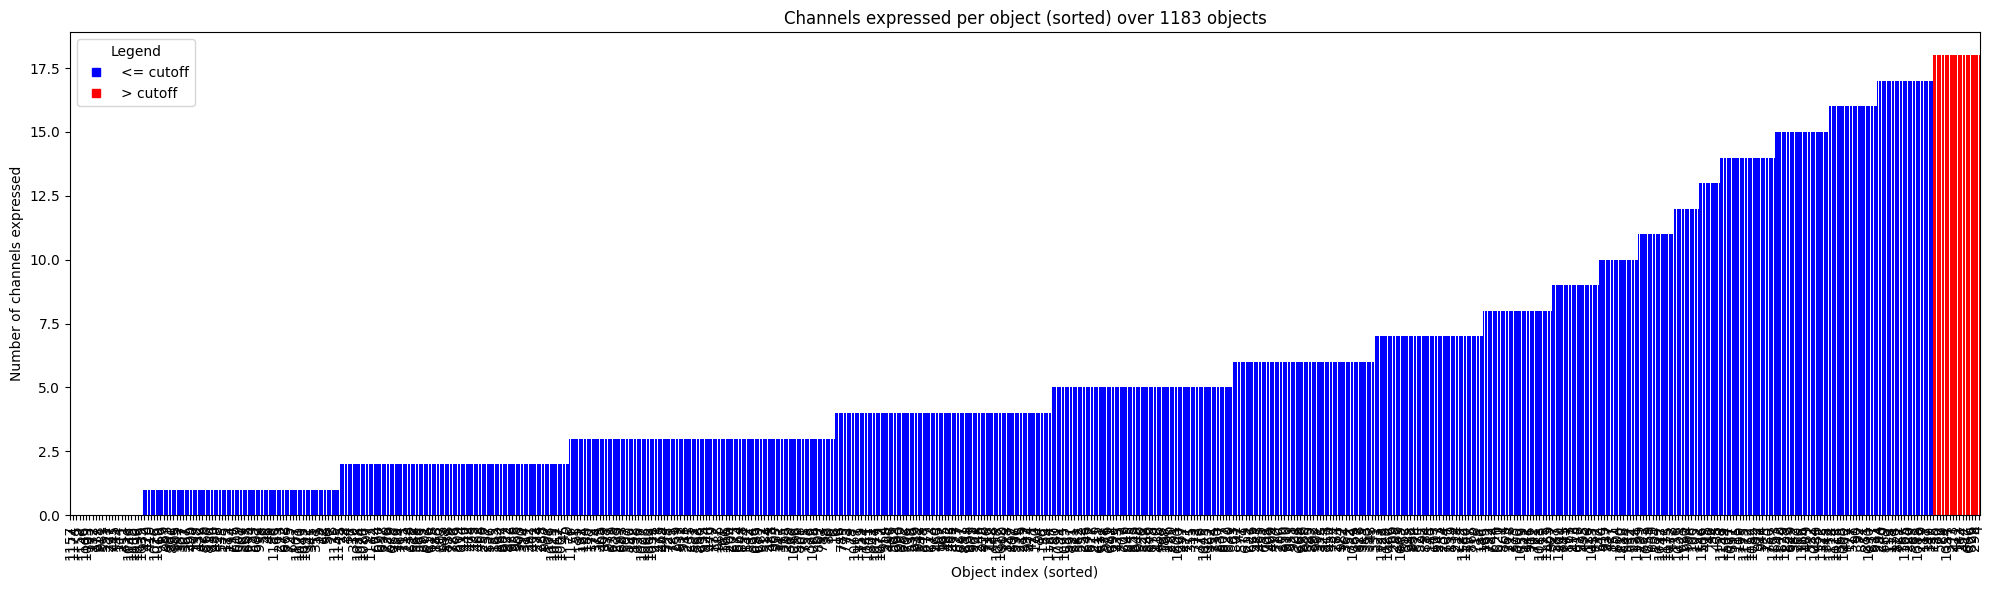

In [22]:
# number of channels expressing
cutoff = 17

# find the object indices that exceed the cutoff
high_expressors = np.where(expressions_per_object > cutoff)[0]
print(high_expressors.shape) # there should be 29 segments that express 18 channels. 
print(f"Indices with more than {cutoff} channels expressed:")
for idx in high_expressors:
    print(f"  Object {idx} has {expressions_per_object[idx]} channels expressed")

# sort objects by their number of channels expressed
sorted_indices = np.argsort(expressions_per_object)           # sort by ascending expression
sorted_expressions = expressions_per_object[sorted_indices]

colors = ["red" if expressions_per_object[i] > cutoff else "blue"  for i in range(total_cells)]
sorted_colors = [colors[i] for i in sorted_indices]

label_step = 2  # Show every nth x-label
plt.figure(figsize=(20, 6))

bars = plt.bar(
    range(len(sorted_expressions)),
    sorted_expressions,
    color=sorted_colors,  # highlight in red
    align="edge",
)

plt.xticks(
    range(0, len(sorted_expressions), label_step),
    sorted_indices[::label_step],
    rotation=90
)

plt.xlabel("Object index (sorted)")
plt.ylabel("Number of channels expressed")
plt.title(
    f"Channels expressed per object (sorted) over {total_cells} objects"
)

plt.legend(handles=[
    plt.Line2D([0],[0], color='blue', marker='s', linestyle='None', label='<= cutoff'),
    plt.Line2D([0],[0], color='red',  marker='s', linestyle='None', label='> cutoff')
], title="Legend")

plt.tight_layout()
plt.margins(x=0)
plt.show()

In [23]:
high_expressors

array([   4,    6,   80,   89,   98,  131,  135,  154,  181,  182,  244,
        273,  275,  298,  316,  327,  347,  354,  370,  378,  394,  396,
        411,  417,  572,  666,  826,  847, 1054])

In [24]:
for index in high_expressors:
    print(index, np.mean(discrete[index]))

4 205.91259203750244
6 152.56823886080306
80 159.11054076984817
89 133.69718179955507
98 159.97953656635843
131 201.26234842009995
135 131.03328988514988
154 150.0344034386137
181 174.10333648410636
182 193.06232702926255
244 187.65405388722795
273 151.6984577067891
275 209.22869119531413
298 230.4440012710845
316 171.88647677520734
327 147.06334219619015
347 167.3244276763266
354 219.24373198156025
370 200.48439329661812
378 184.64827850115984
394 177.00007462202427
396 160.7786145314767
411 187.11733794767756
417 167.64278603785687
572 181.12235116533213
666 218.6610034459814
826 166.238501304774
847 228.75538318252615
1054 160.95858013751345


In [25]:
# this is to get the object id of each neurite in the barcode_data

def get_nth_key(dictionary, n=0):
    if n < 0:
        n += len(dictionary)
    for i, key in enumerate(dictionary.keys()):
        if i == n:
            return key
    raise IndexError("dictionary index out of range")
    
key = get_nth_key(barcode_data, n=284)
val = barcode_data[key]

print(key, val['discrete'])

1099 [np.float64(2.6221610065357064), np.float64(1.1526634566424248), np.float64(3.643159201466158), np.float64(19.53994214147561), np.float64(0.74434768703998), np.float64(86.4676298972812), np.float64(0.4054026962259301), np.float64(0.543025750341803), np.float64(217.18854139704192), np.float64(171.36565664036442), np.float64(51.078435296466274), np.float64(3.067506497382475), np.float64(227.88165199882948), np.float64(181.35756609783485), np.float64(2.6549702943905924), np.float64(3.1869789207702883), np.float64(176.60962271547984), np.float64(3.4963285752162863)]


In [26]:
for index in high_expressors:
    skeleton = get_nth_key(barcode_data, n=index)
    print(skeleton)

1373
344
1444
207
1441
1437
1436
1233
272
340
1324
1323
1296
230
209
1387
1358
1325
1385
177
1284
1419
1342
1320
1412
1418
1458
1403
341


/tmp/ipykernel_46396/294919783.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


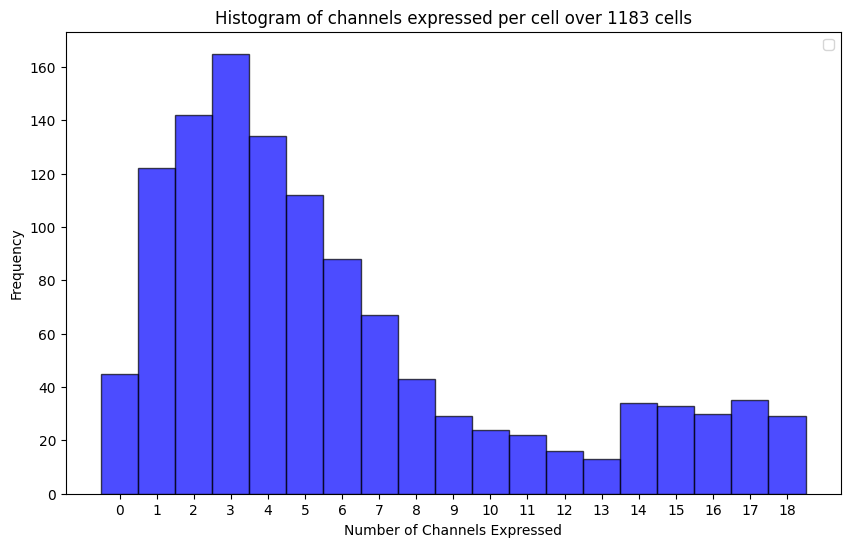

In [27]:
plt.figure(figsize=(10, 6))

bins = np.arange(-0.5, thresholded.shape[1] + 1.5)
plt.hist(
    expressions_per_object,
    bins=bins,
    color="blue",
    alpha=0.7,
    edgecolor="black",
)
plt.xlabel("Number of Channels Expressed")
plt.ylabel("Frequency")
plt.title(
    "Histogram of channels expressed per cell"
    f" over {total_cells} cells"
)
plt.xticks(
    np.arange(0, thresholded.shape[1] + 1)
)  # Adjusting ticks to align with integer values of expressions
plt.legend()

## Population Analysis

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f


=== Basic Statistics ===
Mean: 5.9256
Median: 4.0000
Variance: 23.6479
Standard Deviation: 4.8629
Dispersion Index: 3.9908


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

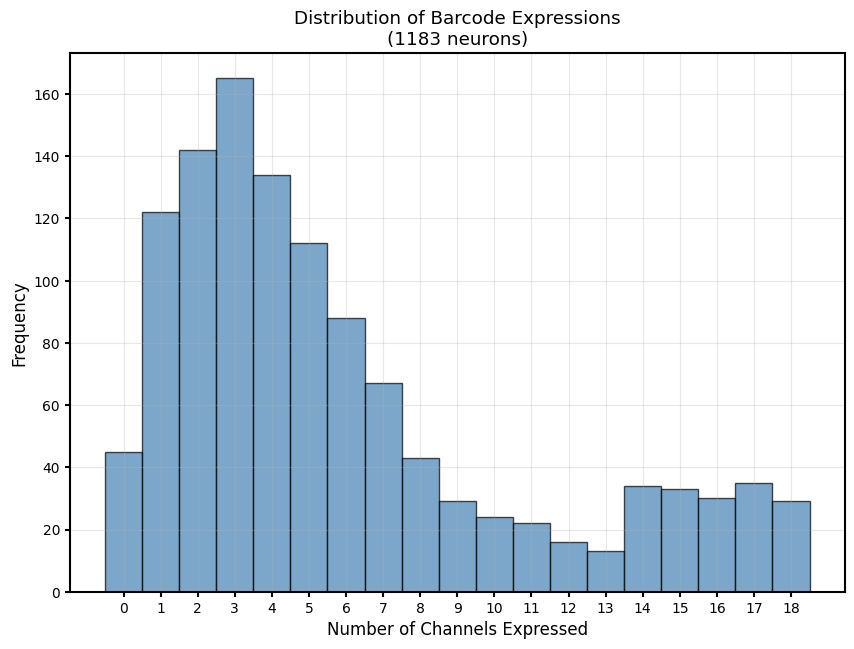

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

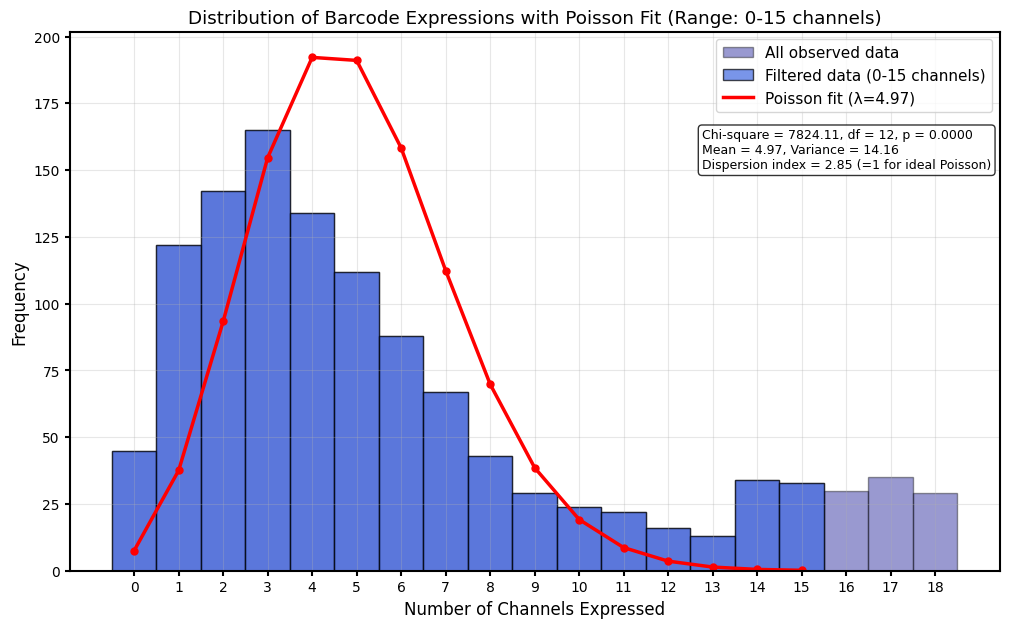

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

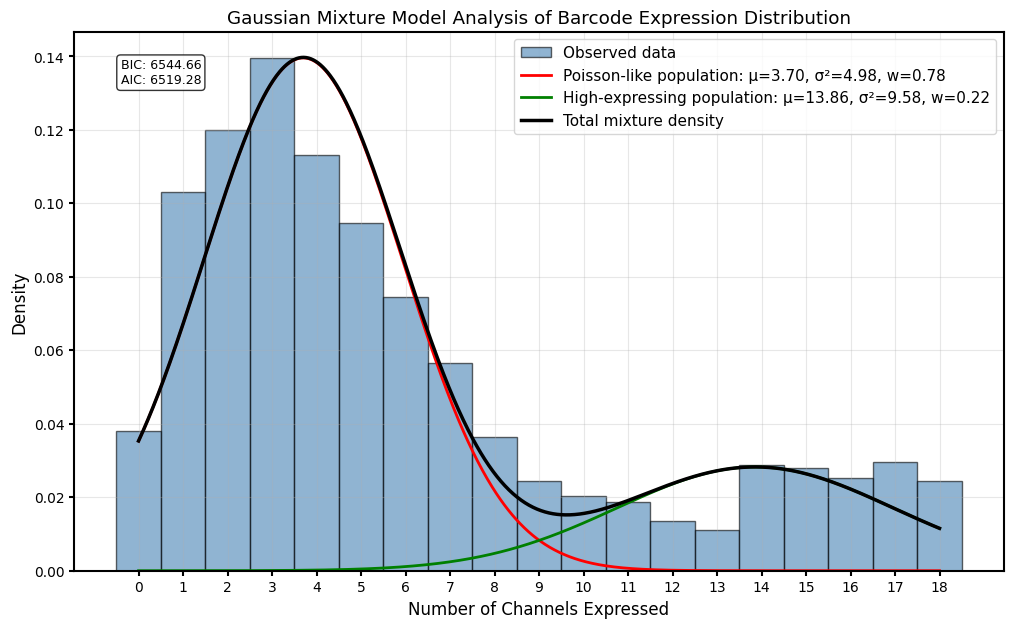

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f


=== Population Summary ===
Population
Expected Population    947
Overexpressors         236
Name: count, dtype: int64

Population Statistics:
                     count       mean       std   min   25%   50%   75%   max
Population                                                                   
Expected Population  947.0   3.800422  2.297457   0.0   2.0   3.0   5.0   9.0
Overexpressors       236.0  14.453390  2.561987  10.0  12.0  15.0  17.0  18.0


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

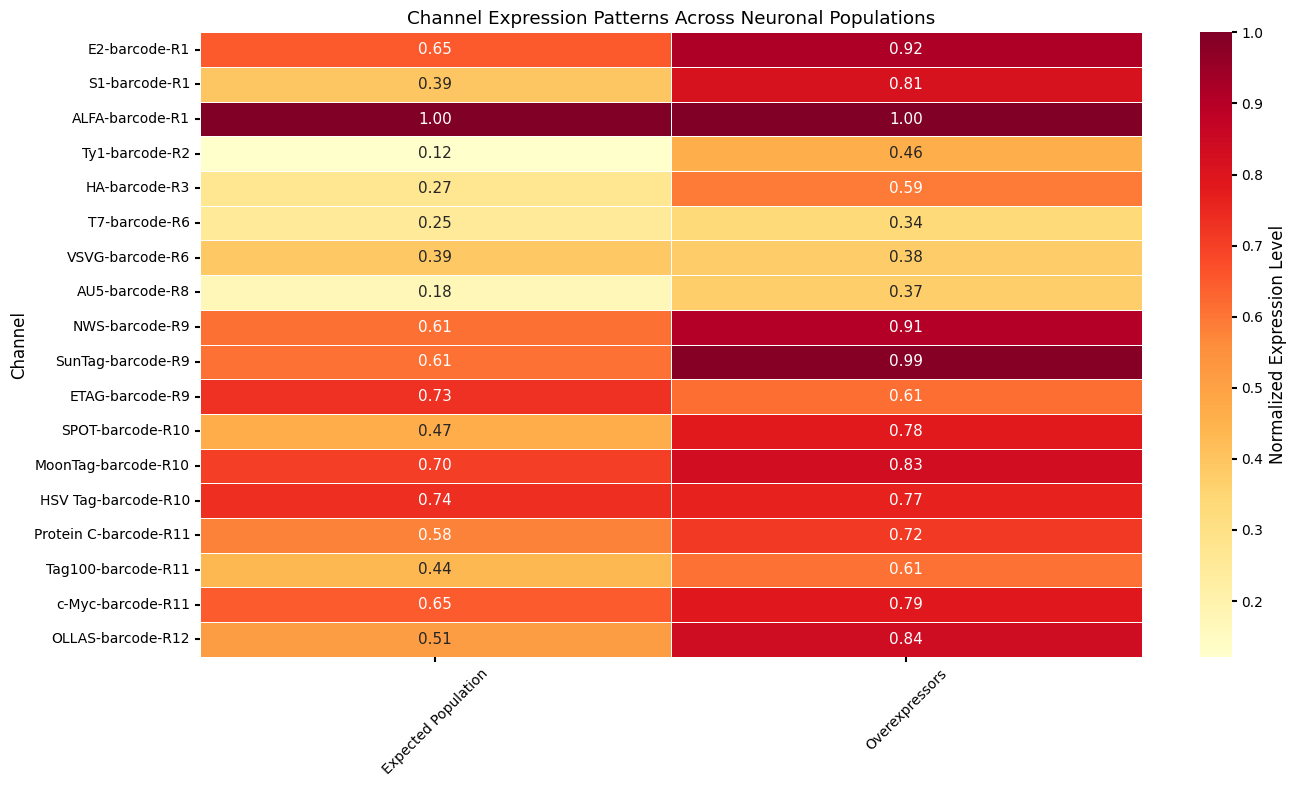

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Set publication-quality figure aesthetics
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

def load_barcode_data(file_path='neuron_barcodes_fixed_keys.npz'):
    """Load barcode data from NPZ file"""
    data = np.load(file_path, allow_pickle=True)
    barcode_data = data['arr_0'].item()
    
    # Extract discrete values (signal intensities) for each object across channels
    discrete = np.array([obj_dict['discrete'] for obj_dict in barcode_data.values()])
    
    # Calculate the threshold for each channel (mean of discrete values)
    threshold = np.mean(discrete, axis=0)
    
    # Create binary matrix where 1 = expression above threshold, 0 = expression below threshold
    thresholded = (discrete > threshold).astype(int)
    
    # Count number of channels expressed for each neuron
    expressions_per_object = np.nansum(thresholded, axis=1)
    
    # Total number of cells/objects analyzed
    total_cells = thresholded.shape[0]
    
    return discrete, thresholded, expressions_per_object, total_cells, threshold

def basic_stats(expressions_per_object):
    """Calculate basic statistical measures of the distribution"""
    mean = np.mean(expressions_per_object)
    median = np.median(expressions_per_object)
     # Handle different scipy.stats.mode API versions
    # mode_result = np.mode(expressions_per_object)
    variance = np.var(expressions_per_object)
    std_dev = np.std(expressions_per_object)
    
    # Calculate dispersion index (variance/mean ratio)
    # For a Poisson distribution, this should be close to 1
    dispersion_index = variance / mean
    
    stats_dict = {
        "Mean": mean,
        "Median": median,
        # "Mode": mode_result,
        "Variance": variance,
        "Standard Deviation": std_dev,
        "Dispersion Index": dispersion_index
    }
    
    return stats_dict

def fit_poisson(data, cutoff=None):
    """Fit a Poisson distribution to the data, optionally using a cutoff value"""
    if cutoff is not None:
        filtered_data = data[data <= cutoff]
    else:
        filtered_data = data
    
    # Calculate lambda (mean) for the Poisson distribution
    lambda_est = np.mean(filtered_data)
    
    # Generate Poisson probabilities
    x_range = np.arange(0, int(np.max(data)) + 1)
    poisson_pmf = stats.poisson.pmf(x_range, lambda_est)
    
    # Scale PMF to match histogram frequency
    expected_counts = poisson_pmf * len(filtered_data)
    
    # Calculate chi-square goodness of fit
    observed, _ = np.histogram(filtered_data, bins=np.arange(-0.5, np.max(filtered_data)+1.5))
    expected = expected_counts[:len(observed)]
    
    # Combine bins with expected counts < 5 (standard practice for chi-square)
    valid_bins = expected >= 5
    if not all(valid_bins):
        combined_observed = []
        combined_expected = []
        current_obs = 0
        current_exp = 0
        
        for i in range(len(observed)):
            current_obs += observed[i]
            current_exp += expected[i]
            
            if current_exp >= 5 or i == len(observed) - 1:
                combined_observed.append(current_obs)
                combined_expected.append(current_exp)
                current_obs = 0
                current_exp = 0
        
        chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
        dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
    else:
        chi2_stat = np.sum(((observed - expected)**2) / expected)
        dof = len(observed) - 1 - 1

    p_value = stats.chi2.sf(chi2_stat, dof)
    
    return {
        "lambda": lambda_est,
        "x_range": x_range,
        "pmf": poisson_pmf,
        "expected_counts": expected_counts,
        "chi2_stat": chi2_stat,
        "dof": dof,
        "p_value": p_value
    }

def fit_mixture_model(expressions_per_object, n_components=2):
    """Fit a Gaussian Mixture Model to identify the two populations"""
    # Reshape the data for sklearn
    X = expressions_per_object.reshape(-1, 1)
    
    # Fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    
    # Get the parameters
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    weights = gmm.weights_
    
    # Sort components by their means (to have consistent ordering)
    sort_idx = np.argsort(means)
    means = means[sort_idx]
    variances = variances[sort_idx]
    weights = weights[sort_idx]
    
    # Calculate BIC and AIC for model evaluation
    bic = gmm.bic(X)
    aic = gmm.aic(X)
    
    # Predict the component for each data point
    labels = gmm.predict(X)
    probabilities = gmm.predict_proba(X)
    
    # Create a x-range for plotting the GMM
    x = np.linspace(0, np.max(expressions_per_object), 1000)
    
    # Calculate the density of each component
    densities = []
    for i in range(n_components):
        component_idx = sort_idx[i]
        density = weights[i] * stats.norm.pdf(x, means[i], np.sqrt(variances[i]))
        densities.append(density)
    
    # Total density
    total_density = np.sum(densities, axis=0)
    
    return {
        "gmm": gmm,
        "means": means,
        "variances": variances,
        "weights": weights,
        "bic": bic,
        "aic": aic,
        "labels": labels,
        "probabilities": probabilities,
        "x_range": x,
        "densities": densities,
        "total_density": total_density
    }

def plot_basic_distribution(expressions_per_object, total_cells, save_path=None):
    """Create a basic histogram of the distribution"""
    plt.figure(figsize=(10, 7))
    
    bins = np.arange(-0.5, np.max(expressions_per_object) + 1.5)
    plt.hist(
        expressions_per_object,
        bins=bins,
        color="steelblue",
        alpha=0.7,
        edgecolor="black",
    )
    
    plt.xlabel("Number of Channels Expressed")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Barcode Expressions\n({total_cells} neurons)")
    
    plt.xticks(np.arange(0, np.max(expressions_per_object) + 1))
    plt.grid(alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_poisson_fit(expressions_per_object, cutoff=15, save_path=None):
    """Plot histogram with Poisson fit using a cutoff value"""
    # Create a filtered dataset using the cutoff
    filtered_indices = expressions_per_object <= cutoff
    filtered_expressions = expressions_per_object[filtered_indices]
    
    # Get Poisson fit data
    poisson_fit = fit_poisson(filtered_expressions)
    
    # Plot the results
    plt.figure(figsize=(12, 7))
    
    # Plot histogram of full observed data
    plt.hist(
        expressions_per_object,
        bins=np.arange(-0.5, np.max(expressions_per_object) + 1.5),
        alpha=0.4,
        color='darkblue',
        label='All observed data',
        edgecolor='black'
    )
    
    # Plot histogram of filtered data
    plt.hist(
        filtered_expressions,
        bins=np.arange(-0.5, cutoff + 1.5),
        alpha=0.7,
        color='royalblue',
        label=f'Filtered data (0-{cutoff} channels)',
        edgecolor='black'
    )
    
    # Plot Poisson PMF for the range
    plt.plot(
        poisson_fit["x_range"][:cutoff+1],
        poisson_fit["expected_counts"][:cutoff+1],
        'r-',
        linewidth=2.5,
        label=f'Poisson fit (λ={poisson_fit["lambda"]:.2f})'
    )
    
    # Add points at the actual x-values for clarity
    plt.plot(
        np.arange(cutoff+1),
        poisson_fit["expected_counts"][:cutoff+1],
        'ro',
        markersize=5
    )
    
    # Add statistical information to the plot
    stats_text = f"Chi-square = {poisson_fit['chi2_stat']:.2f}, df = {poisson_fit['dof']}, p = {poisson_fit['p_value']:.4f}\n"
    stats_text += f"Mean = {poisson_fit['lambda']:.2f}, Variance = {np.var(filtered_expressions):.2f}\n"
    stats_text += f"Dispersion index = {np.var(filtered_expressions)/poisson_fit['lambda']:.2f} (=1 for ideal Poisson)"
    
    plt.annotate(
        stats_text,
        xy=(0.68, 0.82),
        xycoords='axes fraction',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        va='top',
        fontsize=9
    )
    
    plt.xlabel('Number of Channels Expressed')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Barcode Expressions with Poisson Fit (Range: 0-{cutoff} channels)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xticks(np.arange(0, np.max(expressions_per_object) + 1))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return poisson_fit

def plot_gaussian_mixture(expressions_per_object, n_components=2, save_path=None):
    """Plot the GMM fit on the histogram"""
    # Fit the mixture model
    gmm_results = fit_mixture_model(expressions_per_object, n_components)
    
    # Plot the histogram and the fitted GMM
    plt.figure(figsize=(12, 7))
    
    # Plot histogram
    hist_counts, bin_edges, _ = plt.hist(
        expressions_per_object,
        bins=np.arange(-0.5, np.max(expressions_per_object) + 1.5),
        alpha=0.6,
        color='steelblue',
        edgecolor='black',
        density=True,
        label='Observed data'
    )
    
    # Scale for plotting (convert density to counts)
    scale_factor = len(expressions_per_object) * (bin_edges[1] - bin_edges[0])
    
    # Plot the individual components
    colors = ['red', 'green', 'orange', 'purple']  # colors for components
    component_names = ['Poisson-like population', 'High-expressing population']
    
    for i in range(n_components):
        plt.plot(
            gmm_results["x_range"],
            gmm_results["densities"][i],
            '-',
            color=colors[i],
            linewidth=2,
            label=f'{component_names[i]}: μ={gmm_results["means"][i]:.2f}, σ²={gmm_results["variances"][i]:.2f}, w={gmm_results["weights"][i]:.2f}'
        )
    
    # Plot the total density
    plt.plot(
        gmm_results["x_range"],
        gmm_results["total_density"],
        'k-',
        linewidth=2.5,
        label='Total mixture density'
    )
    
    # Add model evaluation metrics
    metrics_text = f"BIC: {gmm_results['bic']:.2f}\nAIC: {gmm_results['aic']:.2f}"
    plt.annotate(
        metrics_text,
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        va='top',
        fontsize=9
    )
    
    plt.xlabel('Number of Channels Expressed')
    plt.ylabel('Density')
    plt.title('Gaussian Mixture Model Analysis of Barcode Expression Distribution')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.xticks(np.arange(0, np.max(expressions_per_object) + 1))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return gmm_results

def classify_neurons(expressions_per_object, gmm_results, discrete, threshold):
    """Classify neurons into populations and analyze their characteristics"""
    # Get classification labels from GMM
    labels = gmm_results["labels"]
    
    # Sort labels by means for consistent ordering
    sort_idx = np.argsort(gmm_results["means"])
    
    # Map labels to populations based on the sorted order (lower mean = Expected, higher mean = Overexpressors)
    population_mapping = {}
    population_mapping[sort_idx[0]] = "Overexpressors"
    population_mapping[sort_idx[1]] = "Expected Population"
    
    # Apply the mapping to get population names
    populations = np.array([population_mapping[label] for label in labels])
    
    # Create a DataFrame with the classifications
    neuron_data = pd.DataFrame({
        'Neuron_ID': np.arange(len(expressions_per_object)),
        'Channels_Expressed': expressions_per_object,
        'Population': populations
    })
    
    # Calculate the channel expression rate for each population
    channel_counts = {}
    for pop in neuron_data['Population'].unique():
        pop_indices = neuron_data[neuron_data['Population'] == pop].index
        channel_counts[pop] = np.mean(discrete[pop_indices], axis=0)
    
    return neuron_data, channel_counts

def plot_population_channel_patterns(neuron_data, channel_counts, channel_names=None, save_path=None):
    """Plot the channel expression patterns for each population"""
    if channel_names is None:
        # Default channel names if not provided
        channel_names = [f"Channel_{i+1}" for i in range(len(channel_counts['Expected Population']))]
    
    # Create a DataFrame for easier plotting
    channel_data = pd.DataFrame(channel_counts)
    channel_data.index = channel_names
    
    # Plot
    plt.figure(figsize=(14, 8))
    
    # Normalize the values for better visualization
    normalized_data = channel_data.copy()
    for col in normalized_data.columns:
        normalized_data[col] = normalized_data[col] / normalized_data[col].max()
    
    # Create heatmap
    sns.heatmap(
        normalized_data,
        cmap="YlOrRd",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={'label': 'Normalized Expression Level'}
    )
    
    plt.title('Channel Expression Patterns Across Neuronal Populations')
    plt.ylabel('Channel')
    plt.xticks(rotation=45)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()
    
    return normalized_data

def run_full_analysis(file_path='Data/neuron_barcodes_full_roi.npz', channel_names=None, output_dir='.'):
    """Run the complete analysis pipeline and save all results"""
    # Load data
    discrete, thresholded, expressions_per_object, total_cells, threshold = load_barcode_data(file_path)
    
    # Basic statistics
    stats = basic_stats(expressions_per_object)
    print("\n=== Basic Statistics ===")
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")
    
    # Create output directory if it doesn't exist
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 1. Basic distribution plot
    plot_basic_distribution(
        expressions_per_object, 
        total_cells, 
        save_path=f"{output_dir}/basic_distribution.png"
    )
    
    # 2. Poisson fit for the lower population
    poisson_fit = plot_poisson_fit(
        expressions_per_object, 
        cutoff=15, 
        save_path=f"{output_dir}/poisson_fit.png"
    )
    
    # 3. Gaussian Mixture Model analysis
    gmm_results = plot_gaussian_mixture(
        expressions_per_object, 
        n_components=2, 
        save_path=f"{output_dir}/gmm_analysis.png"
    )
    
    # 4. Classify neurons and analyze population differences
    neuron_data, channel_counts = classify_neurons(
        expressions_per_object,
        gmm_results,
        discrete,
        threshold
    )
    
    # Summary of populations
    print("\n=== Population Summary ===")
    print(neuron_data['Population'].value_counts())
    print("\nPopulation Statistics:")
    print(neuron_data.groupby('Population')['Channels_Expressed'].describe())
    
    # 5. Channel expression patterns
    normalized_data = plot_population_channel_patterns(
        neuron_data,
        channel_counts,
        channel_names=channel_names,
        save_path=f"{output_dir}/channel_patterns.png"
    )
    
    # Save neuron classifications to CSV
    neuron_data.to_csv(f"{output_dir}/neuron_classifications.csv", index=False)
    
    # Save channel expression data
    pd.DataFrame(channel_counts).to_csv(f"{output_dir}/channel_expression_levels.csv")
    
    return {
        "statistics": stats,
        "poisson_fit": poisson_fit,
        "gmm_results": gmm_results,
        "neuron_data": neuron_data,
        "channel_counts": channel_counts,
        "normalized_data": normalized_data
    }

if __name__ == "__main__":
    # Example channel names (replace with actual channel names if available)
    channel_names = [
        'E2-barcode-R1',
        'S1-barcode-R1',
        'ALFA-barcode-R1',
        'Ty1-barcode-R2',
        'HA-barcode-R3',
        'T7-barcode-R6',
        'VSVG-barcode-R6',
        'AU5-barcode-R8',
        'NWS-barcode-R9',
        'SunTag-barcode-R9',
        'ETAG-barcode-R9',
        'SPOT-barcode-R10',
        'MoonTag-barcode-R10',
        'HSV Tag-barcode-R10',
        'Protein C-barcode-R11',
        'Tag100-barcode-R11',
        'c-Myc-barcode-R11',
        'OLLAS-barcode-R12'
    ]
    
    # Run the full analysis
    results = run_full_analysis(channel_names=channel_names, output_dir='bimodal_analysis_results')

In [29]:
thresholded

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]], shape=(1183, 18))

## Distance Matrix and Hamming Weight Plots

In [30]:
# compute 
#  matrix
dist = distance.pdist(thresholded, metric="hamming")
matrix = distance.squareform(dist)

# Set values close to zero, directly to zero (for cosine precision)
matrix[matrix < 1e-10] = 0

matrix

array([[0.        , 0.33333333, 0.27777778, ..., 0.05555556, 0.38888889,
        0.5       ],
       [0.33333333, 0.        , 0.61111111, ..., 0.38888889, 0.72222222,
        0.38888889],
       [0.27777778, 0.61111111, 0.        , ..., 0.22222222, 0.33333333,
        0.55555556],
       ...,
       [0.05555556, 0.38888889, 0.22222222, ..., 0.        , 0.33333333,
        0.44444444],
       [0.38888889, 0.72222222, 0.33333333, ..., 0.33333333, 0.        ,
        0.33333333],
       [0.5       , 0.38888889, 0.55555556, ..., 0.44444444, 0.33333333,
        0.        ]], shape=(1183, 1183))

In [31]:
bit_differences = matrix * thresholded.shape[1]

max_bit_difference = int(np.max(bit_differences))
bins = np.arange(0, max_bit_difference + 1)

rows, columns = bit_differences.shape
flat = bit_differences.reshape(rows * columns)

print(flat)

[0. 6. 5. ... 8. 6. 0.]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

[ 0  0  0 ... 18 18 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

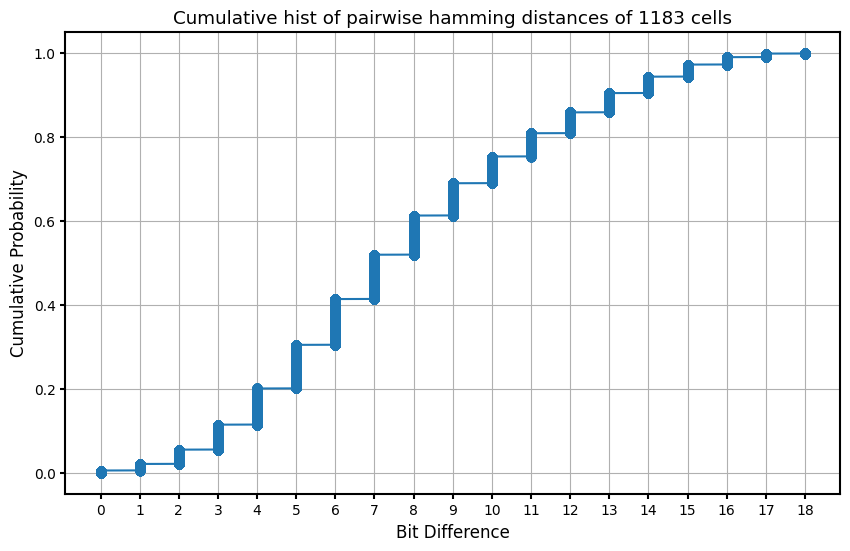

In [32]:
# Plotting the cumulative histogram
plt.figure(figsize=(10, 6))

# sort the data in ascending order
x = np.sort(flat).astype(int)

print(x)

num_cells = x.shape[0]

# get the cdf values of y
y = np.arange(num_cells) / float(num_cells)

print(x_positions)

plt.plot(x, y, marker="o")
plt.xlabel("Bit Difference")
plt.xticks(list(range(num_columns+1)))
plt.ylabel("Cumulative Probability")
plt.title(
    "Cumulative hist of pairwise hamming distances of"
    f" {total_cells} cells"
)
plt.grid(True)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

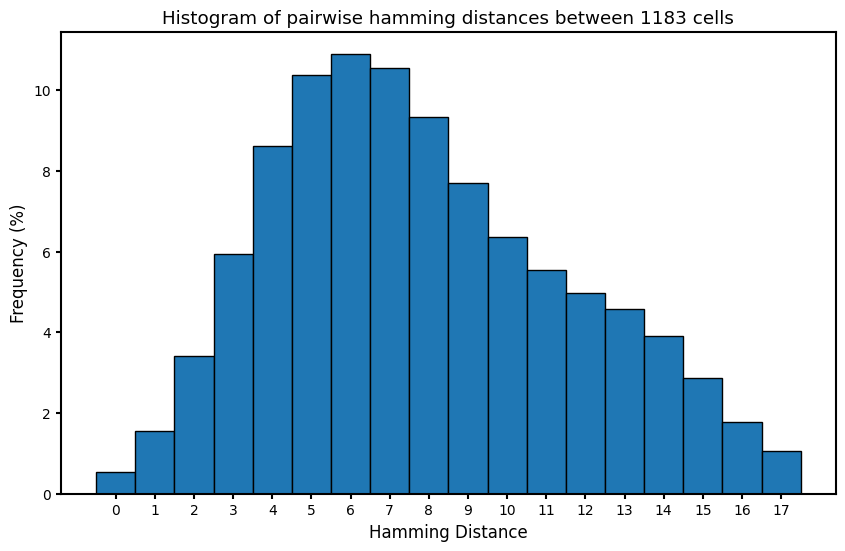

In [33]:
# Plot histogram of hamming distances
plt.figure(figsize=(10, 6))
plt.hist(flat, bins=bins, edgecolor='black', weights=np.ones_like(flat)/len(flat)*100, align='mid')
plt.xlabel("Hamming Distance")
plt.ylabel("Frequency (%)")
plt.title(f"Histogram of pairwise hamming distances between {total_cells} cells")
plt.xticks(bins[:-1] + 0.5, bins[:-1])


np.arange(-0.5, thresholded.shape[1] + 1.5)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

Original data: (1183, 18), Filtered data: (1154, 18)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

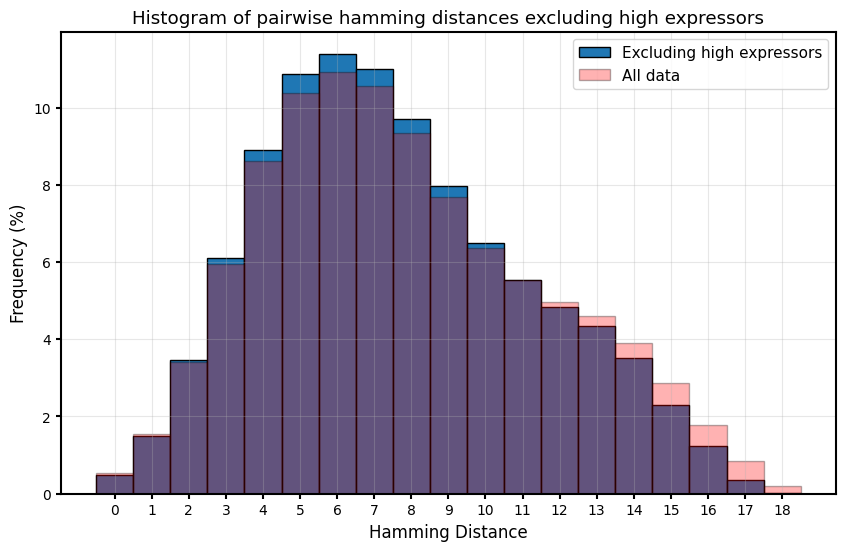

Mean hamming distance for all data: 7.84
Mean hamming distance excluding high expressors: 7.62


In [34]:

# Create a mask to exclude high expressors (neurons expressing > 17 channels)
mask = expressions_per_object <= 17  # Excludes the high expressors

# Get the filtered thresholded data
filtered_thresholded = thresholded[mask]
print(f"Original data: {thresholded.shape}, Filtered data: {filtered_thresholded.shape}")

# Compute new distance matrix on filtered data
filtered_dist = distance.pdist(filtered_thresholded, metric="hamming")
filtered_matrix = distance.squareform(filtered_dist)

# Set values close to zero, directly to zero (for precision)
filtered_matrix[filtered_matrix < 1e-10] = 0

# Convert to bit differences
filtered_bit_differences = filtered_matrix * filtered_thresholded.shape[1]

# Flatten the matrix
rows, columns = filtered_bit_differences.shape
filtered_flat = filtered_bit_differences.reshape(rows * columns)

# Plot histogram of hamming distances for filtered data
plt.figure(figsize=(10, 6))

# Get bin parameters
max_bit_difference = int(np.max(filtered_bit_differences))
bins = np.arange(0, max_bit_difference + 2)

# Create histogram with percentage frequency
plt.hist(filtered_flat, bins=bins, edgecolor='black', 
         weights=np.ones_like(filtered_flat)/len(filtered_flat)*100, align='mid')

plt.xlabel("Hamming Distance")
plt.ylabel("Frequency (%)")
plt.title(f"Histogram of pairwise hamming distances excluding high expressors")
plt.xticks(bins[:-1] + 0.5, bins[:-1])

# For comparison, add the original histogram in a different color with transparency
plt.hist(flat, bins=np.arange(0, int(np.max(bit_differences)) + 2), 
         edgecolor='black', alpha=0.3, color='red',
         weights=np.ones_like(flat)/len(flat)*100, align='mid')

plt.legend(['Excluding high expressors', 'All data'])
plt.grid(alpha=0.3)
plt.show()

# Calculate mean hamming distances
mean_all = np.mean(flat)
mean_filtered = np.mean(filtered_flat)

print(f"Mean hamming distance for all data: {mean_all:.2f}")
print(f"Mean hamming distance excluding high expressors: {mean_filtered:.2f}")


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


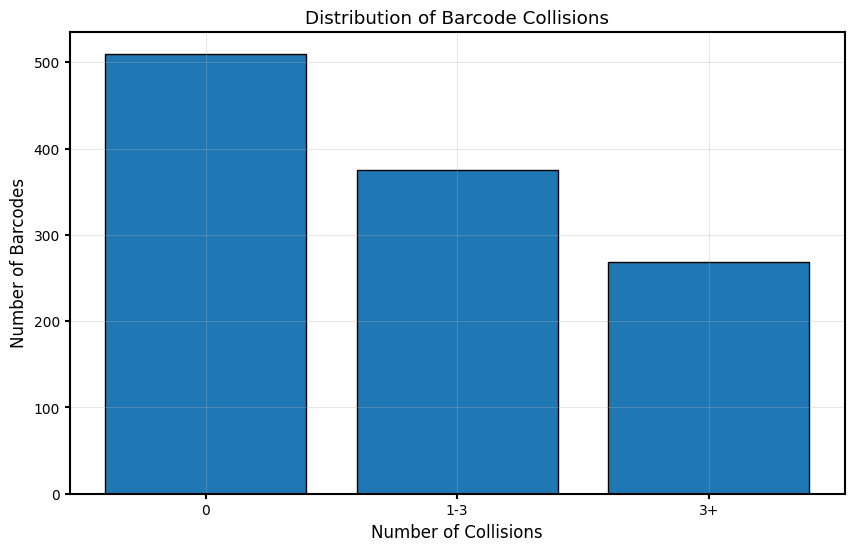

Total number of barcodes: 1154

Barcode collision statistics:
Barcodes with 0 collision(s): 510 (44.2%)
Barcodes with 1-3 collision(s): 375 (32.5%)
Barcodes with 3+ collision(s): 269 (23.3%)


In [35]:
# Count number of barcodes that have X collisions
collision_freq = {}
for i in range(len(filtered_bit_differences)):
    # Count how many collisions (hamming distance 0) this barcode has with others
    collisions = np.sum(filtered_bit_differences[i,:] == 0) - 1  # subtract 1 to exclude self-comparison
    
    # Bin the collisions
    if collisions == 0:
        bin_key = "0"
    elif 1 <= collisions <= 3:
        bin_key = "1-3" 
    else:
        bin_key = "3+"

    if bin_key not in collision_freq:
        collision_freq[bin_key] = 0
    collision_freq[bin_key] += 1

# Create plot with ordered categories
categories = ["0", "1-3", "3+"]
counts = [collision_freq.get(cat, 0) for cat in categories]

plt.figure(figsize=(10,6))
plt.bar(categories, counts, width=0.8, edgecolor='black')

plt.xlabel('Number of Collisions')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Barcode Collisions')

plt.grid(alpha=0.3)
plt.show()

# Print statistics
total_barcodes = sum(collision_freq.values())
print(f"Total number of barcodes: {total_barcodes}")
print("\nBarcode collision statistics:")
for cat in categories:
    count = collision_freq.get(cat, 0)
    print(f"Barcodes with {cat} collision(s): {count} ({count/total_barcodes*100:.1f}%)")






findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Total barcodes analyzed: 1154
Barcodes with exact duplicates (distance = 0): 644 (55.81%)
Mean minimum hamming distance: 0.73
Median minimum hamming distance: 0.00
Min minimum hamming distance: 0.0
Max minimum hamming distance: 4.0


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

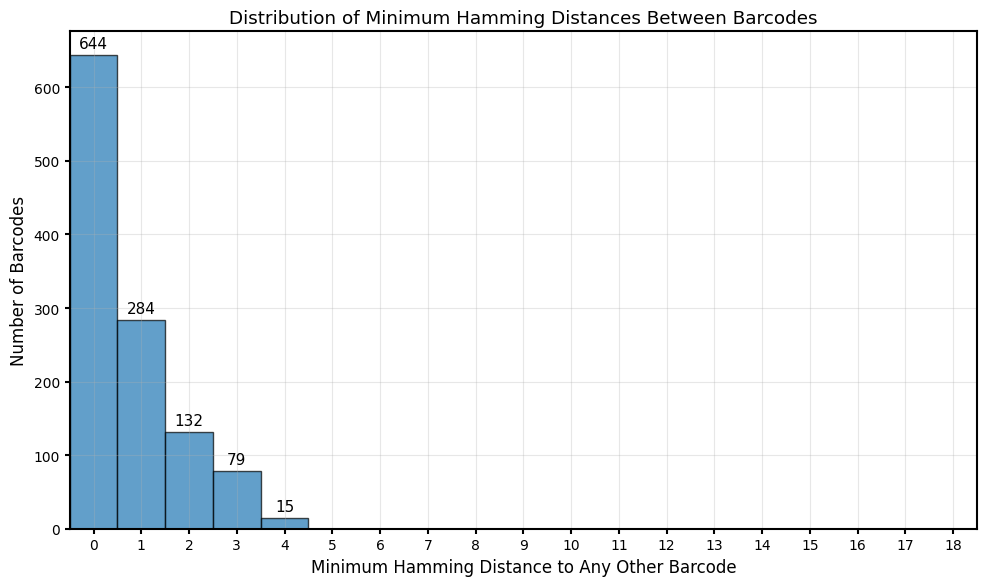

In [36]:
# Calculate the minimum hamming distance for each barcode to any other barcode
min_hamming_distances = []

for i in range(len(filtered_bit_differences)):
    # Get all distances for this barcode
    distances = filtered_bit_differences[i,:]
    # Find the minimum distance to any other barcode (not itself)
    # Sort distances to get the two smallest values
    sorted_distances = np.sort(distances)
    # The smallest distance (index 0) will be 0 (self-comparison)
    # The second smallest (index 1) is the closest other barcode
    if len(sorted_distances) > 1:
        min_distance = sorted_distances[1]  # Second smallest is closest non-self barcode
        min_hamming_distances.append(min_distance)

# Create histogram of minimum hamming distances
plt.figure(figsize=(10, 6))

# Determine the maximum possible hamming distance (number of bits in the barcode)
# Since we're working with filtered_bit_differences, we can infer this is 18 from context
max_possible_distance = 18  # This should be the number of bits in your barcode

# Create bins from 0 to max_possible_distance
bins = np.arange(-0.5, max_possible_distance + 0.5, 1)  # Bins centered on integers

# Count how many have a minimum distance of 0 (exact duplicates)
zero_distance_count = sum(1 for d in min_hamming_distances if d == 0)

# Plot histogram
counts, edges, _ = plt.hist(min_hamming_distances, bins=bins, edgecolor='black', alpha=0.7)

# Add count labels above each bar
for i in range(len(counts)):
    if counts[i] > 0:  # Only add label if there are items in the bin
        plt.text(edges[i] + 0.5, counts[i] + 5, f'{int(counts[i])}', 
                 ha='center', va='bottom')

plt.xlabel('Minimum Hamming Distance to Any Other Barcode')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Minimum Hamming Distances Between Barcodes')
plt.xticks(range(0, max_possible_distance + 1))
plt.xlim(-0.5, max_possible_distance + 0.5)  # Set x-axis limits to show full range
plt.grid(alpha=0.3)

# Print statistics
print(f"Total barcodes analyzed: {len(min_hamming_distances)}")
print(f"Barcodes with exact duplicates (distance = 0): {zero_distance_count} ({zero_distance_count/len(min_hamming_distances)*100:.2f}%)")
print(f"Mean minimum hamming distance: {np.mean(min_hamming_distances):.2f}")
print(f"Median minimum hamming distance: {np.median(min_hamming_distances):.2f}")
print(f"Min minimum hamming distance: {np.min(min_hamming_distances)}")
print(f"Max minimum hamming distance: {np.max(min_hamming_distances)}")

plt.tight_layout()
plt.show()




ToDo


1. Epitope distribution (simple but important!) (done)
2. Epitope distribution and correlation to the NGS sequencing of the input viral pool and input plasmid pool (sending NGS data) Want virus x imaging data, already have viral vs plasmid distribution (pretty linear)
3. Epitope distribution among different cellular structures (e.g. axons, dendrites) -> need semantic seg
4. Variation along a skeleton (may or may not be in this data). -> need skeletons
5. Epitopes observed per cell; fit a curve to this; and or highlight any oddities -> fitting curve (poisson distribution)
investigating high expressing cells
6. Unique barcodes & hamming weights in the volume/along skeletons -> (maybe take this last plot, change it to a histogram)

### Epitope distribution and correlation to the NGS sequencing of the input viral pool and input plasmid pool

In [37]:
# First let's load in the NGS data from Kathleen google sheet. 
# We want to plot the viral vs plasmid distribution of each barcode tag. 

ngs_seq = pd.read_csv("Data/221208-pool-seq.csv")

ngs_seq.head()

,Abundance,epitope,Abundance (plasmid),Frequency (Plasmid),Abundance (AAV),Frequency (Virus),Freq. Delta,Freq. Ratio,Target
0,Lab_N8P_1_p44-maxi_pAAV-eGFP-ct3-ALFA,ALFA,129,4.22%,188,4.06%,-0.16%,-3.82%,4.76%
1,Lab_N8P_2_p45-maxi_pAAV-eGFP-ct3-AU5,AU5,216,7.07%,419,9.05%,1.98%,28.02%,4.76%
2,Lab_N8P_3_p47-maxi_pAAV-eGFP-ct3-Etag,Etag,186,6.09%,206,4.45%,-1.64%,-26.91%,4.76%
3,Lab_N8P_4_p50-maxi_pAAV-eGFP-ct3-HA,HA,195,6.38%,341,7.37%,0.98%,15.41%,4.76%
4,Lab_N8P_5_p51-maxi_pAAV-eGFP-ct3-MAT,MAT,216,7.07%,312,6.74%,-0.33%,-4.67%,4.76%


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

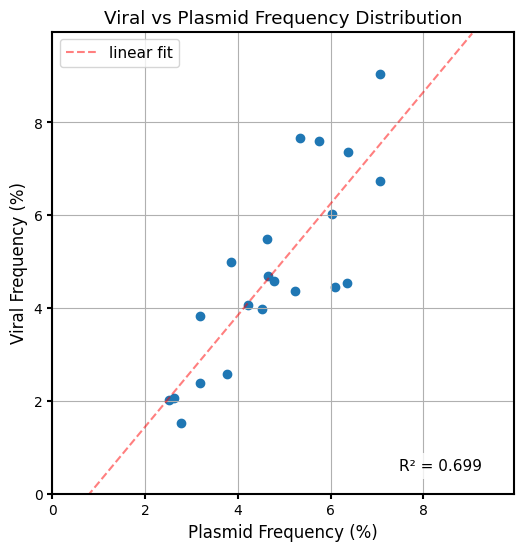

In [38]:
# we want a plot of the viral vs plasmid frequency of each barcode tag.


plt.figure(figsize=(10, 6))

# Get data and calculate max for equal axes
x = ngs_seq['Frequency (Plasmid)'].str.rstrip('%').astype(float)
y = ngs_seq['Frequency (Virus)'].str.rstrip('%').astype(float)
max_val = max(max(x), max(y))

# Create scatter plot
plt.scatter(x, y)

plt.xlabel('Plasmid Frequency (%)')
plt.ylabel('Viral Frequency (%)')
plt.title('Viral vs Plasmid Frequency Distribution')

# Calculate and plot linear regression
slope, intercept = np.polyfit(x, y, 1)
x_line = np.array([0, max_val])
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r--', alpha=0.5, label='linear fit')

# Calculate R^2
y_pred = slope * x + intercept
r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

# Add R^2 annotation
plt.annotate(f'R² = {r_squared:.3f}', 
            xy=(0.75, 0.05), 
            xycoords='axes fraction',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Set equal axes with some padding
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)
plt.gca().set_aspect('equal')

plt.grid(True)
plt.legend()


In [39]:
# now let's make this plot but comparing the viral frequency to the frequency of each barcode tag in the imaging data.
# we want to plot the viral frequency vs the frequency of each barcode tag in the imaging data.

# first, the barcodes in the imaging data are in this order, change viral pool data to match
barcodes = [
    'E2-barcode-R1',
    'S1-barcode-R1',
    'ALFA-barcode-R1',
    'Ty1-barcode-R2',
    'HA-barcode-R3',
    'T7-barcode-R6',
    'VSVG-barcode-R6',
    'AU5-barcode-R8',
    'NWS-barcode-R9',
    'SunTag-barcode-R9',
    'ETAG-barcode-R9',
    'SPOT-barcode-R10',
    'MoonTag-barcode-R10',
    'HSV Tag-barcode-R10',
    'Protein C-barcode-R11',
    'Tag100-barcode-R11',
    'c-Myc-barcode-R11',
    'OLLAS-barcode-R12'
]

ngs_seq_clean = pd.read_csv("Data/221208-pool-seq-clean.csv")

ngs_seq_clean.tail()



,Long name,epitope,Abundance (plasmid),Frequency (Plasmid),Abundance (AAV),Frequency (Virus),Freq. Delta,Freq. Ratio,Target
13,Lab_N8P_18_p303-maxi_pAAV-eGFP-ct3-HSV,HSV,77,2.52%,94,2.03%,-0.49%,-19.43%,4.76%
14,Lab_N8P_9_p55-maxi_pAAV-eGFP-ct3-PRTC,PRTC,141,4.62%,254,5.49%,0.87%,18.89%,4.76%
15,Lab_N8P_13_p61-maxi_pAAV-eGFP-ct3-TG100,TG100,194,6.35%,210,4.54%,-1.81%,-28.56%,4.76%
16,Lab_N8P_15_p293-maxi_pAAV-eGFP-ct3-MYC,MYC,163,5.34%,355,7.67%,2.33%,43.74%,4.76%
17,Lab_N8P_8_p54-maxi_pAAV-eGFP-ct3-OLLAS,OLLAS,138,4.52%,184,3.97%,-0.54%,-12.00%,4.76%


In [40]:
# Extract virus frequency column, strip '%' characters, convert to float, and create numpy array
frequency_viral_pool = np.array(ngs_seq_clean['Frequency (Virus)'].str.rstrip('%').astype(float))

# Print the array to verify
print(frequency_viral_pool)

# Print shape and dtype to confirm it's a numpy array
print(f"Shape: {frequency_viral_pool.shape}")
print(f"Data type: {frequency_viral_pool.dtype}")

[2.38 2.57 4.06 2.07 7.37 4.69 4.99 9.05 6.03 1.53 4.45 3.82 4.58 2.03
 5.49 4.54 7.67 3.97]
Shape: (18,)
Data type: float64


In [41]:
# Plot of viral frequency vs imaging data frequency

# getting data from the imaging data
total_cells = thresholded.shape[0]

frequency_barcode_data = (counts/total_cells)*100

# getting data from the NGS data



In [42]:
frequency_barcode_data

array([54.43786982, 24.00676247, 11.1580727 ,  6.67793745,  1.26796281,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [43]:
frequency_viral_pool

array([2.38, 2.57, 4.06, 2.07, 7.37, 4.69, 4.99, 9.05, 6.03, 1.53, 4.45,
       3.82, 4.58, 2.03, 5.49, 4.54, 7.67, 3.97])

## Plot: Viral Epitope Frequency vs Imaging data epitope frequency

It appears that relative pool balance of epitopes does not correlate well with epitope detection frequency in imaging data. I would hypothesize that this is due to many factors from **1. Translation efficinecy of tags and 2. antibody capture**

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


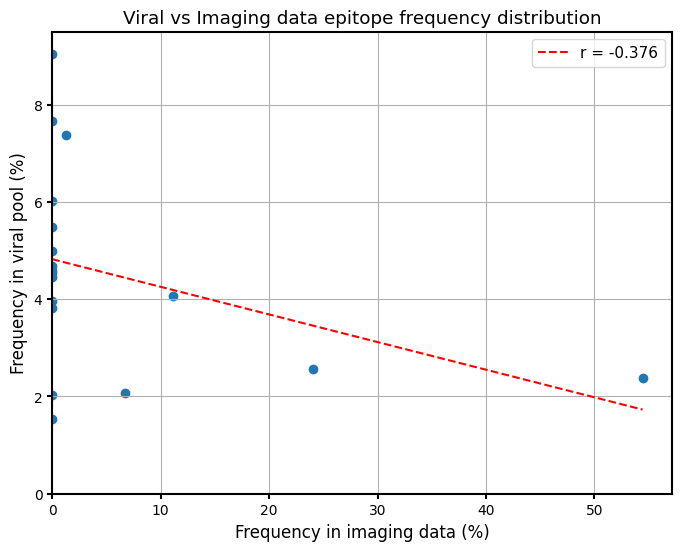

In [44]:

plt.figure(figsize=(8, 6))

# Create scatter plot
plt.scatter(frequency_barcode_data, frequency_viral_pool)

# Add axis labels
plt.xlabel('Frequency in imaging data (%)')
plt.ylabel('Frequency in viral pool (%)')
plt.title('Viral vs Imaging data epitope frequency distribution')

# Set axis to start at 0
plt.xlim(0, max(frequency_barcode_data) * 1.05)
plt.ylim(0, max(frequency_viral_pool) * 1.05)

# Add trend line
z = np.polyfit(frequency_barcode_data, frequency_viral_pool, 1)
p = np.poly1d(z)
x_range = np.linspace(min(frequency_barcode_data), max(frequency_barcode_data), 100)
plt.plot(x_range, p(x_range), "--", color="red", 
         label=f"r = {np.corrcoef(frequency_barcode_data, frequency_viral_pool)[0, 1]:.3f}")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Create a dictionary with the data
data = {
    'epitope': ['ALFA', 'AU5', 'Etag', 'HA', 'MAT', 'PRTC', 'SPOT', 'V5', 'VSV', 'VSVG', 'FLAG', 'HA.11', 'HIS', 'HSV', 'PRTC', 'TG100', 'MYC', 'OLLAS'],
    'viral_freq': frequency_viral_pool,
    'imaging_freq': frequency_barcode_data
}

# Create DataFrame
freq_comparison_df = pd.DataFrame(data)

# Display the DataFrame
print("\nFrequency Comparison DataFrame:")
print(freq_comparison_df)



Frequency Comparison DataFrame:
   epitope  viral_freq  imaging_freq
0     ALFA        2.38     54.437870
1      AU5        2.57     24.006762
2     Etag        4.06     11.158073
3       HA        2.07      6.677937
4      MAT        7.37      1.267963
5     PRTC        4.69      0.000000
6     SPOT        4.99      0.000000
7       V5        9.05      0.000000
8      VSV        6.03      0.000000
9     VSVG        1.53      0.000000
10    FLAG        4.45      0.000000
11   HA.11        3.82      0.000000
12     HIS        4.58      0.000000
13     HSV        2.03      0.000000
14    PRTC        5.49      0.000000
15   TG100        4.54      0.000000
16     MYC        7.67      0.000000
17   OLLAS        3.97      0.000000


## Epitope distibution

### Applying a poisson fit to the data, trying subsets of the data, noting oddities

In [46]:
expressions_per_object # how many channels is expressed by each object: 369 objects


array([2, 8, 3, ..., 1, 5, 7], shape=(1183,))

/tmp/ipykernel_46396/75811667.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

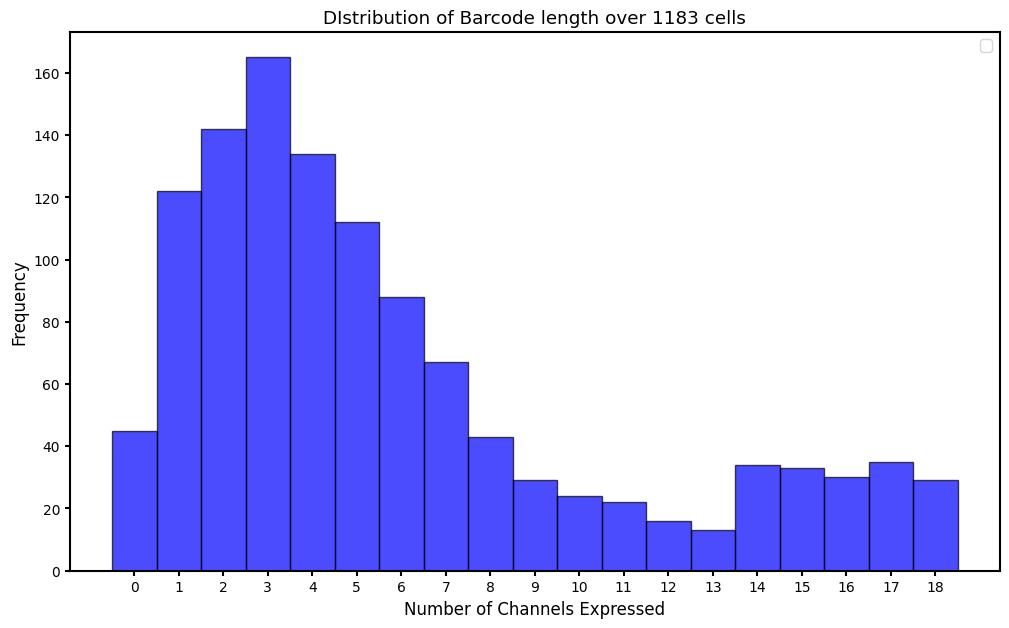

In [47]:
plt.figure(figsize=(12,7))

bins = np.arange(-0.5, thresholded.shape[1] + 1.5)

plt.hist(
    expressions_per_object,
    bins=bins,
    color="blue",
    alpha=0.7,
    edgecolor="black",
)

plt.xlabel("Number of Channels Expressed")
plt.ylabel("Frequency")
plt.title(
    "DIstribution of Barcode length"
    f" over {total_cells} cells"
)


plt.xticks(
    np.arange(0, thresholded.shape[1] + 1)
)  # Adjusting ticks to align with integer values of expressions



plt.legend()


In [48]:
mean = np.mean(expressions_per_object)
median = np.median(expressions_per_object)

print(mean)

5.925612848689772


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

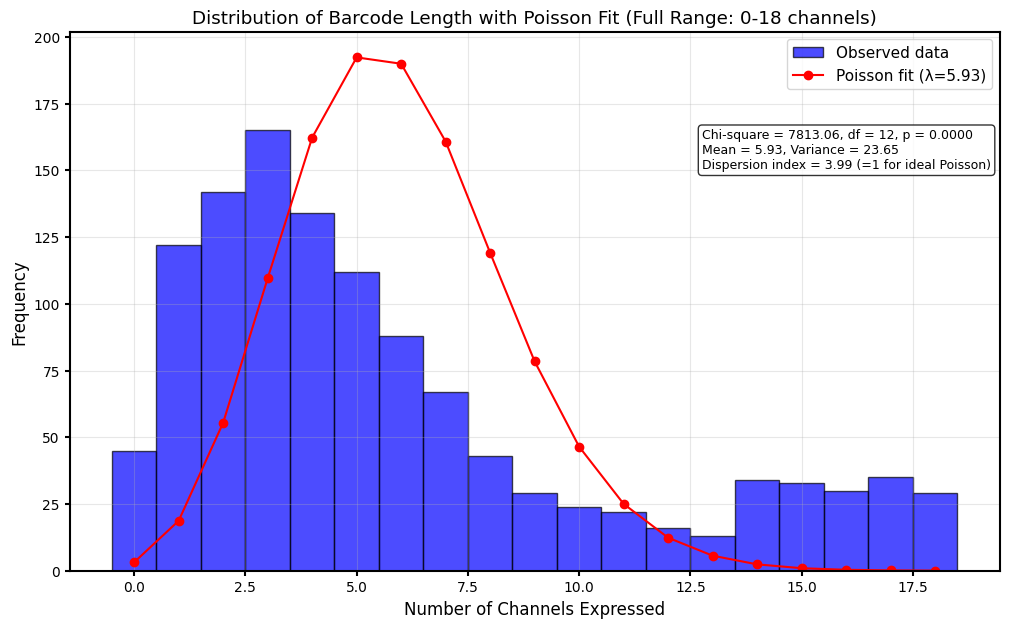

In [49]:

# Use the full dataset for Poisson fitting
full_expressions = expressions_per_object
full_mean = np.mean(full_expressions)
full_var = np.var(full_expressions)
full_total = len(full_expressions)

# Generate histogram data for the full range
hist_range = (0, 19)
hist_bins = np.arange(hist_range[0], hist_range[1] + 1) - 0.5
full_counts, _ = np.histogram(full_expressions, bins=hist_bins)

# Generate Poisson probabilities for the full range
x_poisson = np.arange(0, 19)  # 0 to 18
poisson_pmf = stats.poisson.pmf(x_poisson, full_mean)
poisson_expected_counts = poisson_pmf * full_total

# Calculate chi-square goodness of fit
observed = full_counts
expected = poisson_expected_counts
# Combine bins with expected counts < 5 (standard practice for chi-square)
valid_bins = expected >= 5
if not all(valid_bins):
    # Create combined bins for chi-square calculation only
    combined_observed = []
    combined_expected = []
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        
        if current_exp >= 5 or i == len(observed) - 1:
            combined_observed.append(current_obs)
            combined_expected.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
    dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
else:
    chi2_stat = np.sum(((observed - expected)**2) / expected)
    dof = len(observed) - 1 - 1

p_value = stats.chi2.sf(chi2_stat, dof)

# Calculate dispersion index (variance/mean) - for Poisson this should be ≈ 1
dispersion = full_var / full_mean

# Plot the results
plt.figure(figsize=(12, 7))

# Plot histogram of full observed data
plt.hist(full_expressions, bins=hist_bins, alpha=0.7, 
         color='blue', label='Observed data', edgecolor='black')

# Plot Poisson PMF for full range
plt.plot(x_poisson, poisson_expected_counts, 'ro-', 
         label=f'Poisson fit (λ={full_mean:.2f})')

# Add statistical information to the plot
stats_text = f"Chi-square = {chi2_stat:.2f}, df = {dof}, p = {p_value:.4f}\n"
stats_text += f"Mean = {full_mean:.2f}, Variance = {full_var:.2f}\n"
stats_text += f"Dispersion index = {dispersion:.2f} (=1 for ideal Poisson)"
plt.annotate(stats_text, xy=(0.68, 0.82), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
             va='top', fontsize=9)

plt.xlabel('Number of Channels Expressed')
plt.ylabel('Frequency')
plt.title('Distribution of Barcode Length with Poisson Fit (Full Range: 0-18 channels)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [50]:
print(thresholded.shape)

(1183, 18)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

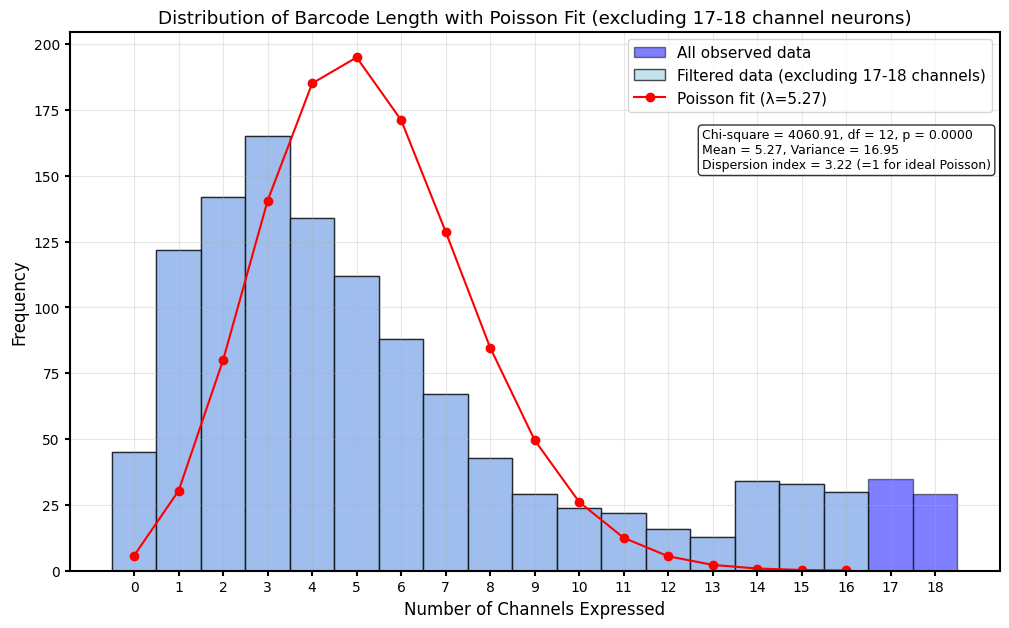

In [51]:
# Create a filtered dataset excluding 17 and 18 channel neurons
filtered_indices = expressions_per_object < 17
filtered_expressions = expressions_per_object[filtered_indices]

# Calculate stats for the filtered dataset
filtered_mean = np.mean(filtered_expressions)
filtered_var = np.var(filtered_expressions)
filtered_total = len(filtered_expressions)

# Generate histogram data for the filtered range
hist_range = (0, 17)
hist_bins = np.arange(hist_range[0], hist_range[1] + 1) - 0.5
filtered_counts, _ = np.histogram(filtered_expressions, bins=hist_bins)

# Generate Poisson probabilities for the filtered range
x_poisson = np.arange(0, 17)  # 0 to 16
poisson_pmf = stats.poisson.pmf(x_poisson, filtered_mean)
poisson_expected_counts = poisson_pmf * filtered_total


# Calculate chi-square goodness of fit
observed = filtered_counts
expected = poisson_expected_counts
# Combine bins with expected counts < 5 (standard practice for chi-square)
valid_bins = expected >= 5
if not all(valid_bins):
    # Create combined bins for chi-square calculation only
    combined_observed = []
    combined_expected = []
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        
        if current_exp >= 5 or i == len(observed) - 1:
            combined_observed.append(current_obs)
            combined_expected.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
    dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
else:
    chi2_stat = np.sum(((observed - expected)**2) / expected)
    dof = len(observed) - 1 - 1

p_value = stats.chi2.sf(chi2_stat, dof)

# Calculate dispersion index (variance/mean) - for Poisson this should be ≈ 1
dispersion = filtered_var / filtered_mean

# Plot the results
plt.figure(figsize=(12, 7))

# Plot histogram of full observed data
plt.hist(expressions_per_object, bins=np.arange(0, 20) - 0.5, alpha=0.5, 
         color='blue', label='All observed data', edgecolor='black')

# Plot histogram of filtered data
plt.hist(filtered_expressions, bins=hist_bins, alpha=0.7, 
         color='lightblue', label='Filtered data (excluding 17-18 channels)', edgecolor='black')

# Plot Poisson PMF for filtered range
plt.plot(x_poisson, poisson_expected_counts, 'ro-', 
         label=f'Poisson fit (λ={filtered_mean:.2f})')

# Add statistical information to the plot
stats_text = f"Chi-square = {chi2_stat:.2f}, df = {dof}, p = {p_value:.4f}\n"
stats_text += f"Mean = {filtered_mean:.2f}, Variance = {filtered_var:.2f}\n"
stats_text += f"Dispersion index = {dispersion:.2f} (=1 for ideal Poisson)"
plt.annotate(stats_text, xy=(0.68, 0.82), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
             va='top', fontsize=9)

plt.xlabel('Number of Channels Expressed')
plt.ylabel('Frequency')
plt.title('Distribution of Barcode Length with Poisson Fit (excluding 17-18 channel neurons)')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, 19, 1))
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

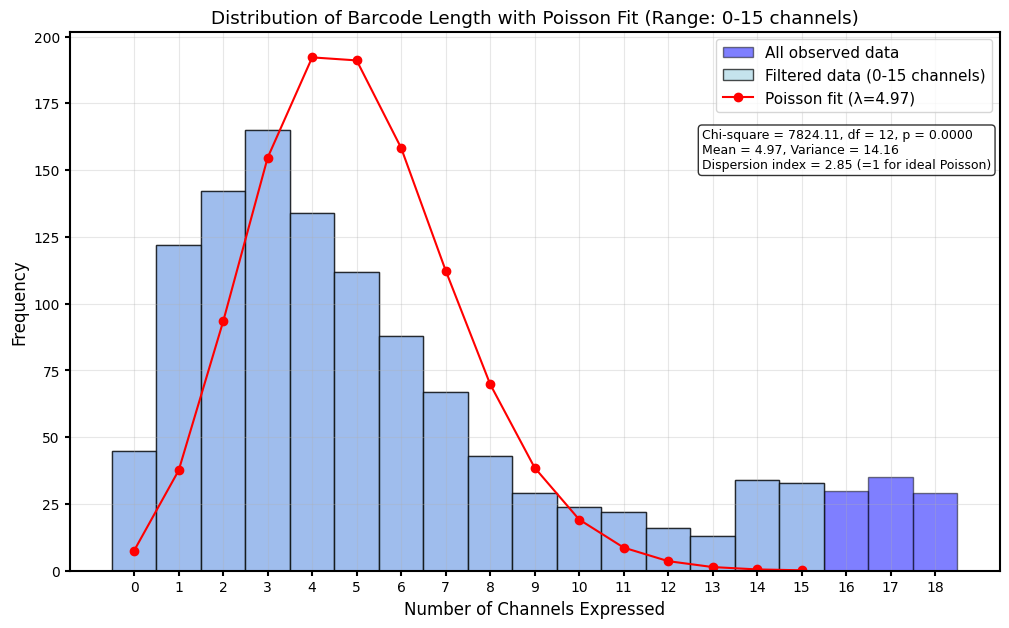

In [52]:
# plot poisson fit on 0-15 channels

# We'll use the existing expressions_per_object array directly
# Create a filtered dataset excluding 16-18 channel neurons (limit to 0-15)
filtered_indices = expressions_per_object <= 15
filtered_expressions = expressions_per_object[filtered_indices]

# Calculate stats for the filtered dataset
filtered_mean = np.mean(filtered_expressions)
filtered_var = np.var(filtered_expressions)
filtered_total = len(filtered_expressions)

# Generate histogram data for the filtered range
hist_range = (0, 16)
hist_bins = np.arange(hist_range[0], hist_range[1] + 1) - 0.5
filtered_counts, _ = np.histogram(filtered_expressions, bins=hist_bins)

# Generate Poisson probabilities for the filtered range
x_poisson = np.arange(0, 16)  # 0 to 15
poisson_pmf = stats.poisson.pmf(x_poisson, filtered_mean)
poisson_expected_counts = poisson_pmf * filtered_total

# Calculate chi-square goodness of fit
observed = filtered_counts
expected = poisson_expected_counts
# Combine bins with expected counts < 5 (standard practice for chi-square)
valid_bins = expected >= 5
if not all(valid_bins):
    # Create combined bins for chi-square calculation only
    combined_observed = []
    combined_expected = []
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        
        if current_exp >= 5 or i == len(observed) - 1:
            combined_observed.append(current_obs)
            combined_expected.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
    dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
else:
    chi2_stat = np.sum(((observed - expected)**2) / expected)
    dof = len(observed) - 1 - 1

p_value = stats.chi2.sf(chi2_stat, dof)

# Calculate dispersion index (variance/mean) - for Poisson this should be ≈ 1
dispersion = filtered_var / filtered_mean

# Plot the results
plt.figure(figsize=(12, 7))

# Plot histogram of full observed data
plt.hist(expressions_per_object, bins=np.arange(0, 20) - 0.5, alpha=0.5, 
         color='blue', label='All observed data', edgecolor='black')


# Plot histogram of filtered data
plt.hist(filtered_expressions, bins=hist_bins, alpha=0.7, 
         color='lightblue', label='Filtered data (0-15 channels)', edgecolor='black')

# Plot Poisson PMF for filtered range
plt.plot(x_poisson, poisson_expected_counts, 'ro-', 
         label=f'Poisson fit (λ={filtered_mean:.2f})')

# Add statistical information to the plot
stats_text = f"Chi-square = {chi2_stat:.2f}, df = {dof}, p = {p_value:.4f}\n"
stats_text += f"Mean = {filtered_mean:.2f}, Variance = {filtered_var:.2f}\n"
stats_text += f"Dispersion index = {dispersion:.2f} (=1 for ideal Poisson)"
plt.annotate(stats_text, xy=(0.68, 0.82), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
             va='top', fontsize=9)

plt.xlabel('Number of Channels Expressed')
plt.ylabel('Frequency')
plt.title('Distribution of Barcode Length with Poisson Fit (Range: 0-15 channels)')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, 19, 1))
plt.show()

In [53]:
print(filtered_total)

1089


### Notes about Barcode length distribution

1. With a mean of 4.5 epitopes expressed per cell, most neurons are expressing a relatively few of the possible epitopes. In a combinatorial regime, the "ideal occupancy" is if each cell expresses 50% of the possible epitopes however the distribution is skewed towards fewer channels being expressed
2. The distibution resembles poisson like however appears more dispersed than a pure poisson would predict. Notably, a subpopulation of neurons are expressing a large number of epitopes (16-18 channels).


Do we know cell types for the segments? 


## Soma Binary Calls

Workflow: 
1. get all segment ids as array from csv data
2. plots (hand called somas collisions, binary collsiions, heat map)

Note: we only have segment ids for 78 of the somas because we only have skeletons for that amount. 

In [54]:
# load in the data
somas_ids = pd.read_csv("Data/LS-somas.csv")
somas_ids.head()

,Index,segment_id,modification to find,new_position,initial_position
0,0,983,[ 0 0 30],[ 495 4636 11285],[ 495 4636 11255]
1,1,591,NaN,[ 495 5005 11666],[ 495 5005 11666]
2,2,1488,NaN,[ 507 5595 10005],[ 507 5595 10005]
3,3,790,NaN,[ 487 5053 9011],[ 487 5053 9011]
4,4,1511,NaN,[ 495 5339 10303],[ 495 5339 10303]


In [55]:
# 1. get all segment ids as array from csv data

# Extract segment IDs from the dataframe, excluding zeros
soma_ids = somas_ids['segment_id'].values
soma_ids = soma_ids[soma_ids != 0]  # Remove any zeros

print(f"Number of soma segment IDs: {len(soma_ids)}")
print(f"Sample of segment IDs: {soma_ids[:5]}")



Number of soma segment IDs: 74
Sample of segment IDs: [ 983  591 1488  790 1511]


In [56]:
def get_binary_barcodes(segment_ids, barcode_data, threshold=None):
    """
    Get binary barcodes for an array of segment IDs.
    
    Parameters:
    -----------
    segment_ids : list or array
        The segment IDs to look up
    barcode_data : dict
        Dictionary containing neurite data with 'discrete' values
    threshold : array, optional
        Threshold values for binarization. If None, will calculate from all discrete values
        
    Returns:
    --------
    dict
        Dictionary mapping segment IDs to their binary barcodes
    """
    # If threshold not provided, calculate it from only the segments in segment_ids
    if threshold is None:
        # Collect discrete values only from the specified segment IDs
        all_discrete = []
        for seg_id in segment_ids:
            if seg_id in barcode_data and 'discrete' in barcode_data[seg_id]:
                all_discrete.append(barcode_data[seg_id]['discrete'])
        # Convert to numpy array and calculate mean for threshold
        all_discrete = np.array(all_discrete)
        threshold = np.mean(all_discrete, axis=0)
    
    # Create dictionary to store results
    binary_barcodes = {}
    
    # Process each segment ID
    for seg_id in segment_ids:
        if seg_id in barcode_data and 'discrete' in barcode_data[seg_id]:
            # Get discrete values for this segment
            discrete_values = np.array(barcode_data[seg_id]['discrete'])
            test = np.array(discrete_values)
            
            # Create binary barcode using threshold
            binary = (discrete_values > threshold).astype(int)
            
            # Store in results dictionary
            binary_barcodes[seg_id] = binary
    
    return binary_barcodes, all_discrete

In [57]:
soma_barcodes, all_discrete = get_binary_barcodes(soma_ids, barcode_data, threshold=None)

# To view a specific barcode:
soma_barcodes

{np.int64(983): array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1]),
 np.int64(591): array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]),
 np.int64(1488): array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]),
 np.int64(790): array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]),
 np.int64(1511): array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 np.int64(1536): array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]),
 np.int64(825): array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]),
 np.int64(1123): array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]),
 np.int64(134): array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]),
 np.int64(108): array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0]),
 np.int64(724): array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]),
 np.int64(183): array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 np.int64(654): array([0, 0, 0, 0, 0, 0, 0, 0, 0

In [58]:
print(all_discrete.shape)

(74, 18)


In [59]:
# Convert soma_barcodes dictionary to a numpy array of barcode arrays
barcode_arrays = []
for seg_id in soma_ids:
    if soma_barcodes[seg_id] is not None:
        barcode_arrays.append(soma_barcodes[seg_id])

# Convert to numpy array
soma_barcodes = np.array(barcode_arrays)

soma_barcodes

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], shape=(74, 18))

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


[17 15 27 17 15 25 11 15 19 15 22 18 33 21 18 21 13 16] [22.97297297 20.27027027 36.48648649 22.97297297 20.27027027 33.78378378
 14.86486486 20.27027027 25.67567568 20.27027027 29.72972973 24.32432432
 44.59459459 28.37837838 24.32432432 28.37837838 17.56756757 21.62162162]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

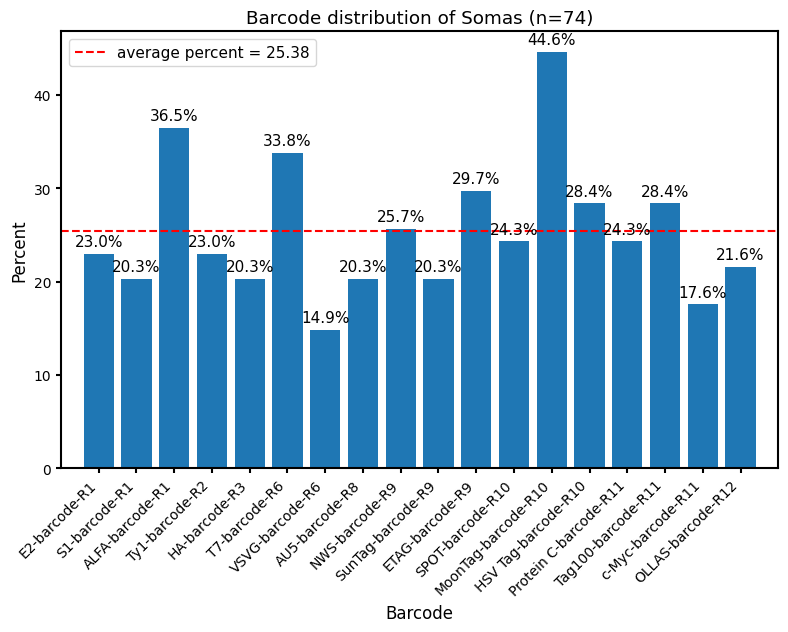

Minimum percentage: 14.86%
Maximum percentage: 44.59%

Number of cells expressing each barcode:
                  Barcode  Count  Percentage
0           E2-barcode-R1     17   22.972973
1           S1-barcode-R1     15   20.270270
2         ALFA-barcode-R1     27   36.486486
3          Ty1-barcode-R2     17   22.972973
4           HA-barcode-R3     15   20.270270
5           T7-barcode-R6     25   33.783784
6         VSVG-barcode-R6     11   14.864865
7          AU5-barcode-R8     15   20.270270
8          NWS-barcode-R9     19   25.675676
9       SunTag-barcode-R9     15   20.270270
10        ETAG-barcode-R9     22   29.729730
11       SPOT-barcode-R10     18   24.324324
12    MoonTag-barcode-R10     33   44.594595
13    HSV Tag-barcode-R10     21   28.378378
14  Protein C-barcode-R11     18   24.324324
15     Tag100-barcode-R11     21   28.378378
16      c-Myc-barcode-R11     13   17.567568
17      OLLAS-barcode-R12     16   21.621622

Summary Statistics:
Total cells analyzed: 74
Tot

In [60]:
total_cells = soma_barcodes.shape[0]
# 369 cells

counts = soma_barcodes.sum(axis=0)


y_axis = (counts / total_cells)*100
y_label = "Percent"

print(counts, y_axis)

plt.figure(figsize=(8, 6))
bars = plt.bar(x_positions, y_axis)
plt.xlim(-1, num_columns)
#plt.xticks(x_positions, x_positions)
plt.xticks(x_positions, barcodes, rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%',
             ha='center', va='bottom', rotation=0)

avg = np.nanmean(y_axis, axis=0)
plt.axhline(
    avg,
    linestyle="--",
    color="red",
    label=f"average percent = {avg:.2f}",
)
plt.legend()

plt.tight_layout()
#plt.xlabel("Channel")
plt.xlabel("Barcode")
plt.ylabel("Percent")
plt.title(f"Barcode distribution of Somas (n=74)")
plt.show()

# Get min and max distribution
min_expr = np.min(y_axis)
max_expr = np.max(y_axis)
print(f"Minimum percentage: {min_expr:.2f}%")
print(f"Maximum percentage: {max_expr:.2f}%")

# Calculate the number of elements in each bin (count of cells expressing each barcode)
bin_counts = counts.astype(int)

# Create a DataFrame to display the counts more clearly
bin_df = pd.DataFrame({
    'Barcode': barcodes,
    'Count': bin_counts,
    'Percentage': y_axis
})

print("\nNumber of cells expressing each barcode:")
print(bin_df)

# Calculate summary statistics
total_cells_expressing = np.sum(bin_counts)
avg_cells_per_barcode = np.mean(bin_counts)
median_cells_per_barcode = np.median(bin_counts)

print(f"\nSummary Statistics:")
print(f"Total cells analyzed: {total_cells}")
print(f"Total cells expressing any barcode: {total_cells_expressing}")
print(f"Average cells per barcode: {avg_cells_per_barcode:.2f}")
print(f"Median cells per barcode: {median_cells_per_barcode:.2f}")



findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

<Figure size 2000x1500 with 0 Axes>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

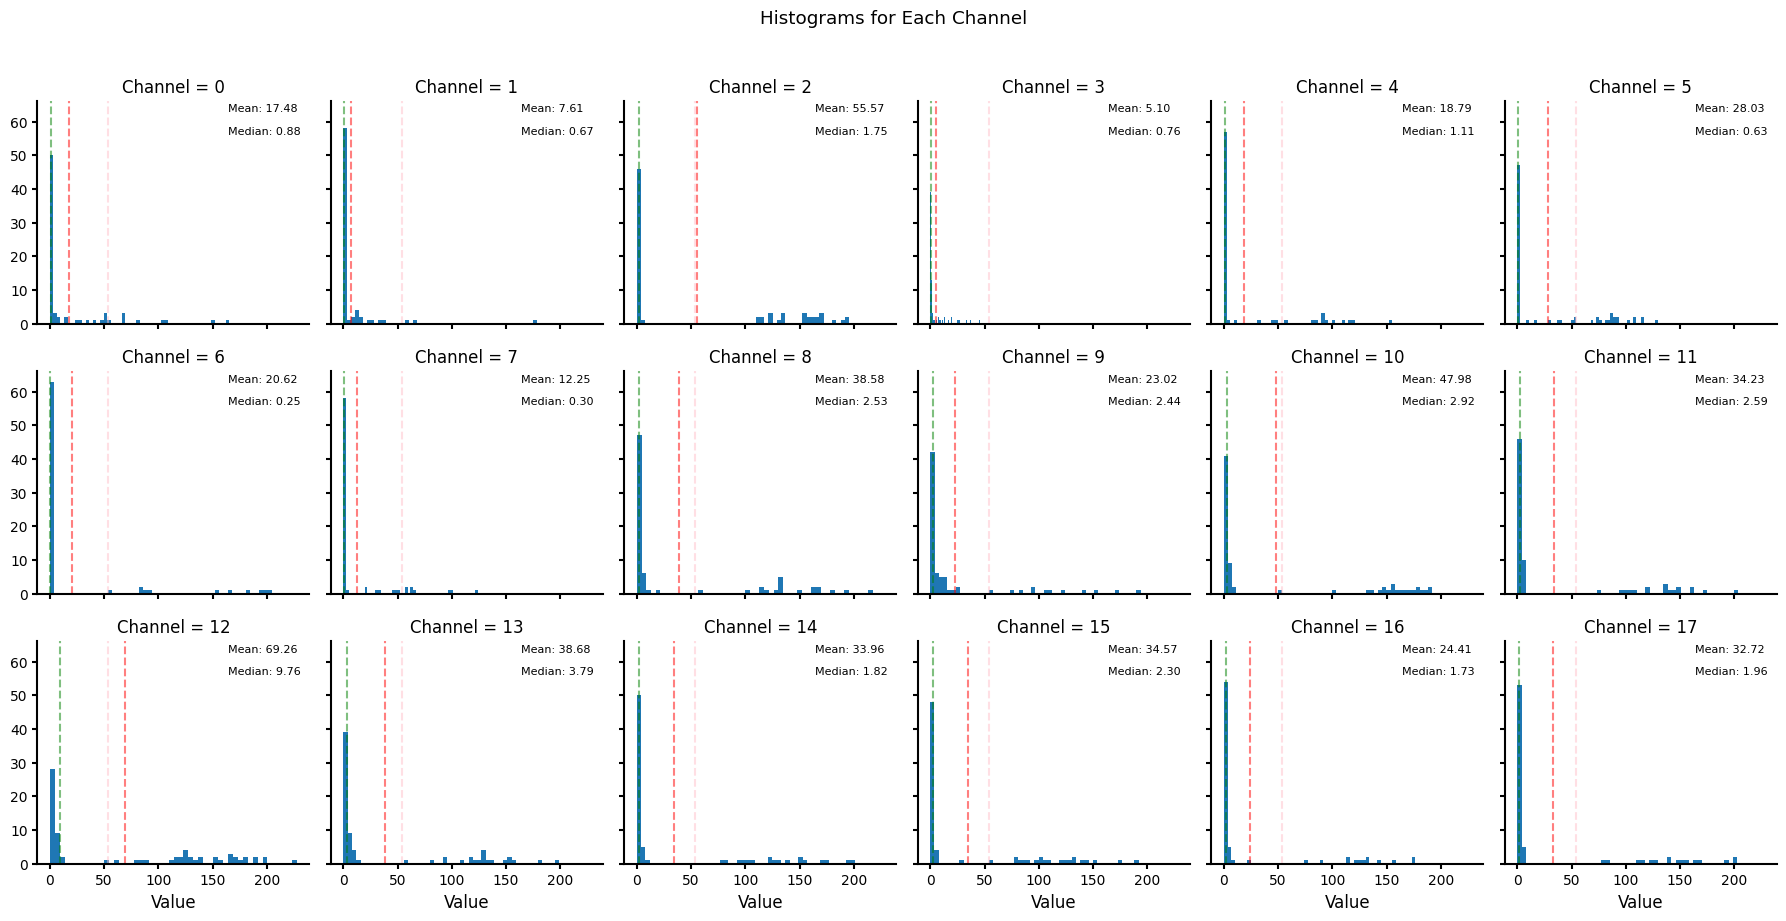

In [102]:
# Melt the dataframe to get it into the right format for faceting
df = pd.DataFrame(all_discrete)

df_melted = df.melt(var_name="Channel", value_name="Value")

# Define a custom plotting function that includes mean and median annotations
def plot_hist_with_stats(data, **kwargs):
    mean_val = data.mean()
    median_val = data.median()
    plt.hist(data, bins=50)
    plt.axvline(mean_val, color="red", linestyle="--", alpha=0.5)
    plt.axvline(median_val, color="green", linestyle="--", alpha=0.5)
    plt.axvline(54, color = "pink", linestyle="--", alpha=0.5, label="50")
    # Add text annotations for mean and median
    plt.text(
        0.7, 0.95, f"Mean: {mean_val:.2f}", transform=plt.gca().transAxes, fontsize=8
    )
    plt.text(
        0.7,
        0.85,
        f"Median: {median_val:.2f}",
        transform=plt.gca().transAxes,
        fontsize=8,
    )


# Create the facet grid of histograms
plt.figure(figsize=(20, 15))
g = sns.FacetGrid(df_melted, col="Channel", col_wrap=6, height=3)
g.map(plot_hist_with_stats, "Value")
g.fig.suptitle("Histograms for Each Channel", y=1.02)
plt.tight_layout()
plt.show()

## Somas Collisions

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

Total cells/somas: 74
Unique barcodes: 68
Barcode collision distribution: {0: 63, 1: 8, 2: 3}
Percentage of cells with unique barcodes: 85.14%


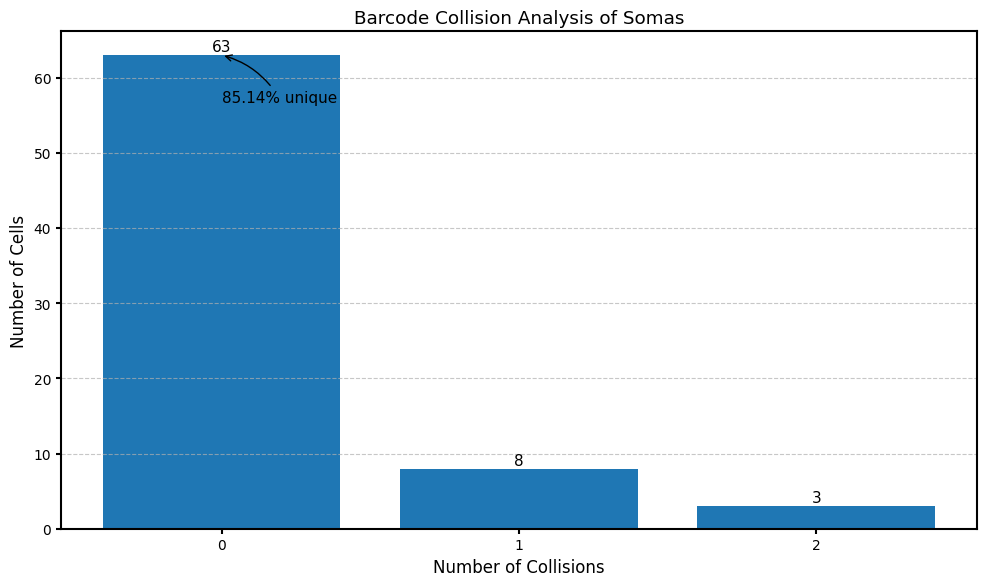

In [59]:
# Collision Analysis and Visualization
def analyze_barcode_collisions(segments_array):
    """
    Analyze barcode collisions in the segments array.
    
    Parameters:
    - segments_array: numpy array where each row represents a cell/soma and each column is a barcode bit
    
    Returns:
    - Dictionary containing collision analysis results
    """
    # Create a tuple for each barcode to make it hashable for counting
    barcodes = [tuple(row) for row in segments_array]
    
    # Count occurrences of each barcode
    from collections import Counter
    barcode_counts = Counter(barcodes)
    
    # Calculate collision statistics
    collision_counts = Counter(barcode_counts.values())
    
    # For each count value, the number of cells having that many collisions
    # is count_value * number_of_barcodes_with_that_count
    collision_distribution = {}
    total_cells = len(segments_array)
    total_accounted = 0
    
    for count_value, num_barcodes in sorted(collision_counts.items()):
        num_cells = count_value * num_barcodes
        collision_distribution[count_value-1] = num_cells  # count_value-1 is the number of collisions
        total_accounted += num_cells
    
    # Verify all cells are accounted for
    assert total_accounted == total_cells, f"Error: {total_accounted} cells accounted for, but expected {total_cells}"
    
    return {
        'collision_distribution': collision_distribution,
        'total_cells': total_cells,
        'unique_barcodes': len(barcode_counts),
        'barcode_counts': barcode_counts
    }

# Assuming 'segments' is your array containing all barcodes for the 147 somas
# If you need to create it from the processed dataframe, use:
# segments = processed_df[target_channels].values

# Analyze collisions
collision_results = analyze_barcode_collisions(segments_array=soma_barcodes)

# Display basic statistics
print(f"Total cells/somas: {collision_results['total_cells']}")
print(f"Unique barcodes: {collision_results['unique_barcodes']}")
print(f"Barcode collision distribution: {collision_results['collision_distribution']}")

# Calculate what percentage of cells have a unique barcode
unique_cells = collision_results['collision_distribution'].get(0, 0)
percent_unique = (unique_cells / collision_results['total_cells']) * 100
print(f"Percentage of cells with unique barcodes: {percent_unique:.2f}%")

# Create a visualization of the collision distribution
plt.figure(figsize=(10, 6))
collision_data = collision_results['collision_distribution']
collisions = sorted(collision_data.keys())
cell_counts = [collision_data[c] for c in collisions]

# Bar plot
bars = plt.bar(collisions, cell_counts)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Barcode Collision Analysis of Somas')
plt.xlabel('Number of Collisions')
plt.ylabel('Number of Cells')
plt.xticks(collisions)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage annotation for unique barcodes
plt.annotate(f"{percent_unique:.2f}% unique", 
             xy=(0, cell_counts[collisions.index(0)] if 0 in collisions else 0), 
             xytext=(0, max(cell_counts)*0.9),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.tight_layout()
plt.show()